# Test imports, configs, etc

## Original pipeline

In [2]:
# custom classes
from SatellitesDataset import get_test_dataset,get_train_dataset,SatellitesDataset
from SatellitesAugs import SatellitesTrainAugmentation,SatellitesTestAugmentation
from Loss import BCEDiceLoss
from LinkNet import LinkNet34
from UNet import UNet11
from presets import preset_dict

preset = 'rgb_ps'
bit8_imgs,bit8_masks,cty_no = get_train_dataset(preset,preset_dict)
or_imgs,cty_no_mask = get_test_dataset(preset,preset_dict)
len(bit8_imgs),len(bit8_masks),len(cty_no),len(or_imgs),len(cty_no_mask)

from sklearn.model_selection import train_test_split

train_imgs, val_imgs, train_masks, val_masks = train_test_split(bit8_imgs,
                                                                bit8_masks,
                                                                test_size=0.2,
                                                                stratify = cty_no,
                                                                random_state=42)

len(train_imgs),len(train_masks)

train_augs = SatellitesTrainAugmentation(shape=1280,
                                         aug_scheme = None
                                        )

val_augs = SatellitesTestAugmentation(shape=1280)

dataset = SatellitesDataset(preset = preset_dict[preset],
            image_paths = train_imgs,
             mask_paths = train_masks,                 
             transforms = train_augs,
            )

Augmentations are NOT enabled for train


In [6]:
import pandas as pd
pd.DataFrame(cty_no)[0].value_counts()

3    1028
0     981
1     283
2     257
Name: 0, dtype: int64

In [4]:
import random

img,mask  = dataset.__getitem__(random.randint(0,100))

In [7]:
mask

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.85227275, 0.85227275,
        0.85227275],
       [0.        , 0.        , 0.        , ..., 0.85227275, 0.85227275,
        0.85227275],
       [0.        , 0.        , 0.        , ..., 0.01704546, 0.01704546,
        0.01704546]], dtype=float32)

start
image processing complete 0.12017488479614258


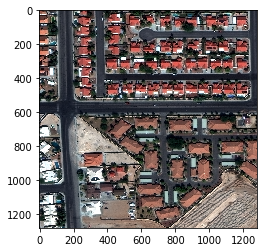

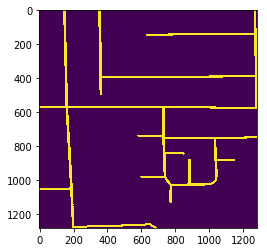

plotting complete 0.42572522163391113


In [25]:
import matplotlib.pyplot as plt
import time
import random
import numpy as np

start = time.time()
print("start")

img,mask  = dataset.__getitem__(random.randint(0,100))

end = time.time()
print('image processing complete', end - start)

img = img.cpu().numpy().astype(np.float32).transpose((1, 2, 0))
img += -img.min()
img *= (1/img.max())

plt.imshow(img)
plt.show()

mask = mask.cpu().numpy().astype(np.float32).transpose((1, 2, 0))[:,:,0]
mask += -mask.min()
mask *= (1/mask.max())

plt.imshow(mask)
plt.show()

end = time.time()
print('plotting complete', end - start)

In [4]:
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

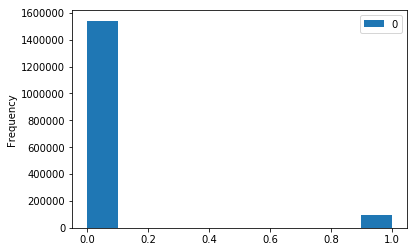

In [5]:
import pandas as pd

df = pd.DataFrame(mask.reshape(-1,1))
df.plot(kind='hist')
plt.show()

In [6]:
img,mask  = dataset.__getitem__(random.randint(0,100))

In [11]:
mask.min()

0.0

In [26]:
1280*1280

1638400

In [23]:
(np.asarray(mask) > 0.5).astype(np.uint8).sum()

122794

In [12]:
test.astype(np.uint8)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [25]:
    print('Train images: {}\t'
          'Train  masks: {}\t'
          'Val   images: {}\t'
          'Val    masks: {}\t'.format(len([1]),len([1]),
                                      len([1]),len([1])))

Train images: 1	Train  masks: 1	Val   images: 1	Val    masks: 1	


In [27]:
import shutil

shutil.rmtree('tb_logs/test/')

PermissionError: [Errno 13] Permission denied: 'events.out.tfevents.1515653499.4c3715934f1a'

## 3 layered mask pipeline

In [1]:
import tqdm
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split

# custom classes
from UNet import UNet11
from LinkNet import LinkNet34
from Loss import BCEDiceLoss,TDiceLoss,DiceLoss
from LossSemSeg import cross_entropy2d
from presets import preset_dict
from SatellitesDataset import get_test_dataset,get_train_dataset,SatellitesDataset,get_train_dataset_for_predict,get_train_dataset_wide_masks,get_train_dataset_layered_masks
from SatellitesAugs import SatellitesTrainAugmentation,SatellitesTestAugmentation
from presets import preset_dict

In [29]:
import torch

bit8_imgs,bit8_masks,cty_no = get_train_dataset_wide_masks('mul_ps_vegetation',
                                                           preset_dict)  

train_augs = SatellitesTrainAugmentation(aug_scheme=True,shape=1280)

train_imgs, val_imgs, train_masks, val_masks = train_test_split(bit8_imgs,
                                                                bit8_masks,
                                                                test_size=0.2,
                                                                stratify=cty_no,
                                                                random_state=42)
    
    
train_dataset = SatellitesDataset(preset = preset_dict['mul_ps_vegetation'],
                                  image_paths = train_imgs,
                                  mask_paths = train_masks,
                                  transforms = train_augs,
                                 )

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=2,        
    shuffle=True,
    num_workers=1,
    pin_memory=False)

Augmentations are enabled for train


In [3]:
len(train_imgs)

1828

In [ ]:
871

In [30]:
import numpy.random as random

img,mask  = train_dataset.__getitem__(871)
img.size(),mask.size()

(torch.Size([3, 1280, 1280]), torch.Size([1, 1280, 1280]))

In [18]:
mask[0,:,:].mean(),mask[1,:,:].mean(),mask[2,:,:].mean()

(0.015104166, 0.015104166, 0.015104166)

In [16]:
mask[0,:,:].max(),mask[1,:,:].max(),mask[2,:,:].max()

(1.0, 1.0, 0.0)

start
368
image processing complete 0.08103632926940918


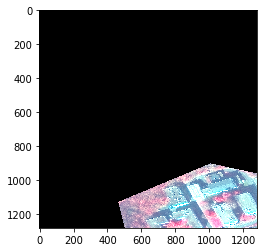

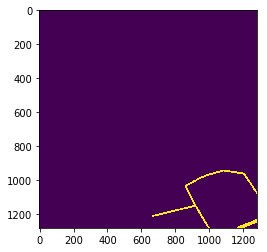

plotting complete 0.3906533718109131


In [37]:
import matplotlib.pyplot as plt
import time
import random
import numpy as np

start = time.time()
print("start")

number = random.randint(0,1828-1)
print(number)

img,mask  = train_dataset.__getitem__(871)

end = time.time()
print('image processing complete', end - start)

img = img.cpu().numpy().astype(np.float32).transpose((1, 2, 0))
img += -img.min()
img *= (1/img.max())

plt.imshow(img)
plt.show()

mask = mask.cpu().numpy().astype(np.float32).transpose((1, 2, 0))[:,:,0]
mask += -mask.min()
mask *= (1/mask.max())

plt.imshow(mask)
plt.show()

end = time.time()
print('plotting complete', end - start)

In [1]:
import pandas as pd

df = pd.read_csv('geojson_df_full.csv')
df.head()

Unnamed: 0                                         linestring  lane_number  \
0           0  [[-115.2302976, 36.13671528660451], [-115.2295...            2   
1           1  [[-115.22732442896, 36.13768973302], [-115.228...            2   
2           2  [[-115.2273535423063, 36.1388276998], [-115.22...            2   
3           3  [[-115.2302976, 36.138575903683275], [-115.229...            2   
4           4  [[-115.22729652201, 36.13669630622], [-115.227...            2   

   paved  road_type              img_id  \
0      1          5  AOI_2_Vegas_img738   
1      1          5  AOI_2_Vegas_img738   
2      1          5  AOI_2_Vegas_img738   
3      1          5  AOI_2_Vegas_img738   
4      1          5  AOI_2_Vegas_img738   

                                        geojson_path  
0  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
1  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
2  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
3  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
4  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...

In [7]:
table = pd.pivot_table(df,
               index=["img_id"],
               columns = ['paved'],
               values=["linestring"],
               aggfunc={len},fill_value=0)

table.columns = ['count_paved','count_non_paved'] 
table[table.count_paved == 0].shape

(98, 2)

In [9]:
table.shape

(2549, 2)

In [14]:
table[table.count_paved < table.count_non_paved].mean(),table[table.count_paved < table.count_non_paved].

(count_paved         5.714286
 count_non_paved    23.719577
 dtype: float64, (378, 2))

In [19]:
import pandas as pd

df = pd.read_csv('geojson_df_full.csv')

table = pd.pivot_table(df,
               index=["img_id"],
               columns = ['paved'],
               values=["linestring"],
               aggfunc={len},fill_value=0)

table.columns = ['count_paved','count_non_paved'] 

mostly_non_paved_imgs = list(table[table.count_paved < table.count_non_paved].index.values)

In [24]:
mostly_non_paved_imgs[0]

'AOI_2_Vegas_img1160'

In [22]:
wide_mask_df_file = 'new_masks.csv'

new_mask_df = pd.read_csv(wide_mask_df_file)
good_new_masks = list(new_mask_df[new_mask_df.correct == 1].img_names.values)

In [27]:
import os 

meta_data_file = os.path.join('../','metadata.csv')
mask_df_file = os.path.join('../','mask_df.csv')

mask_df = pd.read_csv(mask_df_file)
meta_df = pd.read_csv(meta_data_file)
data_df = mask_df.merge(meta_df[['img_subfolders','width','channels']], how = 'left', left_on = 'img_file', right_on = 'img_subfolders')

In [46]:
data_df['img_subfolders'].apply(lambda x: 'AOI'+x.split('AOI')[1][:-4]).isin(mostly_non_paved_imgs).sum()

1512

In [25]:
df['city'] = df['img_id'].apply(lambda x: x.split('_img')[0])
df.head()

Unnamed: 0                                         linestring  lane_number  \
0           0  [[-115.2302976, 36.13671528660451], [-115.2295...            2   
1           1  [[-115.22732442896, 36.13768973302], [-115.228...            2   
2           2  [[-115.2273535423063, 36.1388276998], [-115.22...            2   
3           3  [[-115.2302976, 36.138575903683275], [-115.229...            2   
4           4  [[-115.22729652201, 36.13669630622], [-115.227...            2   

   paved  road_type              img_id  \
0      1          5  AOI_2_Vegas_img738   
1      1          5  AOI_2_Vegas_img738   
2      1          5  AOI_2_Vegas_img738   
3      1          5  AOI_2_Vegas_img738   
4      1          5  AOI_2_Vegas_img738   

                                        geojson_path         city  
0  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  AOI_2_Vegas  
1  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  AOI_2_Vegas  
2  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  AOI_2_Vegas  
3  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  AOI_2_Vegas  
4  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  AOI_2_Vegas

In [1]:
table = pd.pivot_table(df,
               index=["city","paved"],
               values=["img_id"],
               aggfunc={len},fill_value=0)

table


NameError: name 'pd' is not defined

# Try the 8-channel model

In [12]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
import torch.nn.functional as F

nonlinearity = nn.ReLU

class DecoderBlock(nn.Module):
    def __init__(self, in_channels, n_filters):
        super().__init__()

        # B, C, H, W -> B, C/4, H, W
        self.conv1 = nn.Conv2d(in_channels, in_channels // 4, 1)
        self.norm1 = nn.BatchNorm2d(in_channels // 4)
        self.relu1 = nonlinearity(inplace=True)

        # B, C/4, H, W -> B, C/4, H, W
        self.deconv2 = nn.ConvTranspose2d(in_channels // 4, in_channels // 4, 3,
                                          stride=2, padding=1, output_padding=1)
        self.norm2 = nn.BatchNorm2d(in_channels // 4)
        self.relu2 = nonlinearity(inplace=True)

        # B, C/4, H, W -> B, C, H, W
        self.conv3 = nn.Conv2d(in_channels // 4, n_filters, 1)
        self.norm3 = nn.BatchNorm2d(n_filters)
        self.relu3 = nonlinearity(inplace=True)

    def forward(self, x):
        x = self.conv1(x)
        x = self.norm1(x)
        x = self.relu1(x)
        x = self.deconv2(x)
        x = self.norm2(x)
        x = self.relu2(x)
        x = self.conv3(x)
        x = self.norm3(x)
        x = self.relu3(x)
        return x

class LinkNet34(nn.Module):
    def __init__(self, num_classes, num_channels=3):
        super().__init__()
        
        filters = [64, 128, 256, 512]
        resnet = models.resnet34(pretrained=True)

        # self.firstconv = resnet.conv1
        # assert num_channels == 3, "num channels not used now. to use changle first conv layer to support num channels other then 3"
        # try to use 8-channels as first input
        if num_channels==3:
            self.firstconv = resnet.conv1
        else:
            self.firstconv = nn.Conv2d(num_channels, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
        
        self.firstbn = resnet.bn1
        self.firstrelu = resnet.relu
        self.firstmaxpool = resnet.maxpool
        self.encoder1 = resnet.layer1
        self.encoder2 = resnet.layer2
        self.encoder3 = resnet.layer3
        self.encoder4 = resnet.layer4

        # Decoder
        self.decoder4 = DecoderBlock(filters[3], filters[2])
        self.decoder3 = DecoderBlock(filters[2], filters[1])
        self.decoder2 = DecoderBlock(filters[1], filters[0])
        self.decoder1 = DecoderBlock(filters[0], filters[0])

        # Final Classifier
        self.finaldeconv1 = nn.ConvTranspose2d(filters[0], 32, 3, stride=2)
        self.finalrelu1 = nonlinearity(inplace=True)
        self.finalconv2 = nn.Conv2d(32, 32, 3)
        self.finalrelu2 = nonlinearity(inplace=True)
        self.finalconv3 = nn.Conv2d(32, num_classes, 2, padding=1)

    # noinspection PyCallingNonCallable
    def forward(self, x):
        # Encoder
        x = self.firstconv(x)
        x = self.firstbn(x)
        x = self.firstrelu(x)
        x = self.firstmaxpool(x)
        e1 = self.encoder1(x)
        e2 = self.encoder2(e1)
        e3 = self.encoder3(e2)
        e4 = self.encoder4(e3)

        # Decoder with Skip Connections
        d4 = self.decoder4(e4) + e3
        # d4 = e3
        d3 = self.decoder3(d4) + e2
        d2 = self.decoder2(d3) + e1
        d1 = self.decoder1(d2)

        # Final Classification
        f1 = self.finaldeconv1(d1)
        f2 = self.finalrelu1(f1)
        f3 = self.finalconv2(f2)
        f4 = self.finalrelu2(f3)
        f5 = self.finalconv3(f4)

        # return f5 
        return F.sigmoid(f5)

In [14]:
model = LinkNet34(num_classes=1,
                 num_channels=8)

In [15]:
model

LinkNet34 (
  (firstconv): Conv2d(8, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (firstbn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (firstrelu): ReLU (inplace)
  (firstmaxpool): MaxPool2d (size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1))
  (encoder1): Sequential (
    (0): BasicBlock (
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock (
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU (inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): 

In [16]:
inputs = torch.autograd.Variable(torch.randn(1,8,320,320))
out = model(inputs)
print (out.size())

torch.Size([1, 1, 320, 320])


In [29]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torch.nn import functional as F

def conv3x3(in_, out):
    return nn.Conv2d(in_, out, 3, padding=1)

def concat(xs):
    return torch.cat(xs, 1)

class Conv3BN(nn.Module):
    def __init__(self, in_: int, out: int, bn=False):
        super().__init__()
        self.conv = conv3x3(in_, out)
        self.bn = nn.BatchNorm2d(out) if bn else None
        self.activation = nn.SELU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        if self.bn is not None:
            x = self.bn(x)
        x = self.activation(x)
        return x

class UNetModule(nn.Module):
    def __init__(self, in_: int, out: int):
        super().__init__()
        self.l1 = Conv3BN(in_, out)
        self.l2 = Conv3BN(out, out)

    def forward(self, x):
        x = self.l1(x)
        x = self.l2(x)
        return x

class ConvRelu(nn.Module):
    def __init__(self, in_: int, out: int):
        super().__init__()
        self.conv = conv3x3(in_, out)
        self.activation = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.activation(x)
        return x

class DecoderBlock(nn.Module):
    def __init__(self, in_channels, middle_channels, out_channels):
        super().__init__()

        self.block = nn.Sequential(
            ConvRelu(in_channels, middle_channels),
            nn.ConvTranspose2d(middle_channels, out_channels, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.block(x)      
    
class UNet11(nn.Module):
    def __init__(self,
                 
                 num_classes=1,
                 num_filters=32,
                 num_channels=3):
        super().__init__()
        self.pool = nn.MaxPool2d(2, 2)
        encoder = models.vgg11(pretrained=True).features
        self.relu = encoder[1]
        
        # try to use 8-channels as first input
        if num_channels==3:
            self.conv1 = self.encoder[0]
        else:
            self.conv1 = nn.Conv2d(num_channels, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))    
        
        self.conv2 = encoder[3]
        self.conv3s = encoder[6]
        self.conv3 = encoder[8]
        self.conv4s = encoder[11]
        self.conv4 = encoder[13]
        self.conv5s = encoder[16]
        self.conv5 = encoder[18]

        self.center = DecoderBlock(num_filters * 8 * 2, num_filters * 8 * 2, num_filters * 8)
        self.dec5 = DecoderBlock(num_filters * (16 + 8), num_filters * 8 * 2, num_filters * 8)
        self.dec4 = DecoderBlock(num_filters * (16 + 8), num_filters * 8 * 2, num_filters * 4)
        self.dec3 = DecoderBlock(num_filters * (8 + 4), num_filters * 4 * 2, num_filters * 2)
        self.dec2 = DecoderBlock(num_filters * (4 + 2), num_filters * 2 * 2, num_filters)
        self.dec1 = ConvRelu(num_filters * (2 + 1), num_filters)

        self.final = nn.Conv2d(num_filters, num_classes, kernel_size=1)

    def forward(self, x):
        conv1 = self.relu(self.conv1(x))
        conv2 = self.relu(self.conv2(self.pool(conv1)))
        conv3s = self.relu(self.conv3s(self.pool(conv2)))
        conv3 = self.relu(self.conv3(conv3s))
        conv4s = self.relu(self.conv4s(self.pool(conv3)))
        conv4 = self.relu(self.conv4(conv4s))
        conv5s = self.relu(self.conv5s(self.pool(conv4)))
        conv5 = self.relu(self.conv5(conv5s))

        center = self.center(self.pool(conv5))

        dec5 = self.dec5(torch.cat([center, conv5], 1))
        dec4 = self.dec4(torch.cat([dec5, conv4], 1))
        dec3 = self.dec3(torch.cat([dec4, conv3], 1))
        dec2 = self.dec2(torch.cat([dec3, conv2], 1))
        dec1 = self.dec1(torch.cat([dec2, conv1], 1))
        return F.sigmoid(self.final(dec1))


In [31]:
model = UNet11(num_classes=1,
               num_filters=32,
               num_channels=8)

model

UNet11 (
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (relu): ReLU (inplace)
  (conv1): Conv2d(8, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3s): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4s): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5s): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (center): DecoderBlock (
    (block): Sequential (
      (0): ConvRelu (
        (conv): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): ReLU (inplace)
      )
      (1): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(

In [32]:
inputs = torch.autograd.Variable(torch.randn(1,8,320,320))
out = model(inputs)
print (out.size())

torch.Size([1, 1, 320, 320])


# Generate masks by myself 

In [6]:
!ls ../data/AOI_2_Vegas_Roads_Train/summaryData

AOI_2_Vegas_Roads_Train.csv


In [3]:
from presets import preset_dict

data_prefix = '../data'

folders = ['AOI_2_Vegas_Roads_Train',
           'AOI_5_Khartoum_Roads_Train',
           'AOI_3_Paris_Roads_Train',
           'AOI_4_Shanghai_Roads_Train']



In [4]:
import os

path = os.path.join(data_prefix,folders[0],'summaryData',folders[0]+'.csv')

import pandas as pd

ls_df = pd.read_csv(path)
ls_df.tail()

In [98]:
import pandas as pd

ls_df = pd.read_csv(path)
ls_df.tail()

ImageId                                            WKT_Pix
17930  AOI_2_Vegas_img592  LINESTRING (750.37 1300.00, 750.77 1122.87, 75...
17931  AOI_2_Vegas_img592  LINESTRING (769.91 0.00, 770.80 123.01, 749.51...
17932  AOI_2_Vegas_img592  LINESTRING (750.77 1122.87, 1012.74 1114.56, 1...
17933  AOI_2_Vegas_img592         LINESTRING (751.70 720.78, 1005.50 715.97)
17934  AOI_2_Vegas_img592  LINESTRING (1300.00 576.57, 1002.96 576.00, 10...

In [137]:
ls_df.iloc[34]

ImageId                            AOI_2_Vegas_img1116
WKT_Pix    LINESTRING (678.34 1263.84, 624.61 1300.00)
Name: 34, dtype: object

In [99]:
ls_df[ls_df.ImageId=='AOI_2_Vegas_img592']

ImageId                                            WKT_Pix
17918  AOI_2_Vegas_img592             LINESTRING (19.78 1300.00, 11.02 0.00)
17919  AOI_2_Vegas_img592  LINESTRING (108.28 347.02, 324.93 347.03, 652....
17920  AOI_2_Vegas_img592          LINESTRING (325.77 405.27, 109.39 409.71)
17921  AOI_2_Vegas_img592  LINESTRING (122.81 873.09, 125.18 1035.66, 538...
17922  AOI_2_Vegas_img592  LINESTRING (603.77 1193.42, 122.81 1201.78, 12...
17923  AOI_2_Vegas_img592  LINESTRING (324.11 290.42, 324.93 347.03, 325....
17924  AOI_2_Vegas_img592  LINESTRING (752.69 286.54, 653.11 287.45, 324....
17925  AOI_2_Vegas_img592  LINESTRING (751.38 857.67, 606.93 854.70, 601....
17926  AOI_2_Vegas_img592  LINESTRING (601.88 1300.00, 603.77 1193.42, 60...
17927  AOI_2_Vegas_img592  LINESTRING (752.13 533.44, 611.51 532.33, 610....
17928  AOI_2_Vegas_img592  LINESTRING (653.11 287.45, 652.58 348.69, 652....
17929  AOI_2_Vegas_img592  LINESTRING (749.51 147.49, 718.65 127.26, 719....
17930  AOI_2_Vegas_img592  LINESTRING (750.37 1300.00, 750.77 1122.87, 75...
17931  AOI_2_Vegas_img592  LINESTRING (769.91 0.00, 770.80 123.01, 749.51...
17932  AOI_2_Vegas_img592  LINESTRING (750.77 1122.87, 1012.74 1114.56, 1...
17933  AOI_2_Vegas_img592         LINESTRING (751.70 720.78, 1005.50 715.97)
17934  AOI_2_Vegas_img592  LINESTRING (1300.00 576.57, 1002.96 576.00, 10...

In [9]:
sample

Unnamed: 0  width  height  channels   im_size         ctime  \
1428        1428   1300    1300         1   3383838  1.515131e+09   
2414        2414   1300    1300         3  10150778  1.515131e+09   
3645        3645   1300    1300         8  27050820  1.515132e+09   
5246        5246    325     325         8   1693020  1.515131e+09   

             mtime                img_files     img_folders  \
1428  1.510776e+09  AOI_2_Vegas_Roads_Train             PAN   
2414  1.510776e+09  AOI_2_Vegas_Roads_Train  RGB-PanSharpen   
3645  1.510776e+09  AOI_2_Vegas_Roads_Train  MUL-PanSharpen   
5246  1.510776e+09  AOI_2_Vegas_Roads_Train             MUL   

                             img_subfolders  
1428             PAN_AOI_2_Vegas_img885.tif  
2414  RGB-PanSharpen_AOI_2_Vegas_img885.tif  
3645  MUL-PanSharpen_AOI_2_Vegas_img885.tif  
5246             MUL_AOI_2_Vegas_img885.tif

In [200]:
import numpy as np
from skimage.io import imread
from skimage import img_as_ubyte,img_as_float
from skimage import exposure
from skimage.draw import circle
import cv2
from collections import Counter
        
def read_image(preset,path):
    img = imread(path)
    target_channels = np.zeros(shape=(preset['width'],preset['width'],len(preset['channels'])))

    # expand grayscale images to 3 dimensions
    if len(img.shape)<3:
        img = np.expand_dims(img, 2)                

    for i,channel in enumerate(preset['channels']):
        target_channels[:,:,i] = img[:,:,channel-1]

    # target_channels = img_as_ubyte(target_channels)
    # target_channels = exposure.rescale_intensity(target_channels, in_range='uint8')           

    return target_channels
    
def draw_mask(circle_size,
              line_width,
              ls_list,
              mask_size
             ):

    ls_lines = [(line[len('LINESTRING ('):-1]) for line in ls_list]

    mask = np.zeros((mask_size, mask_size), dtype=np.uint8)
    all_points = []
    
    for line in ls_lines:
        points = line.split(', ')
        points_xy = []
        for point in points:
            x,y = point.split()
            points_xy.append([x,y])
        
        all_points.extend(points_xy)
        
        for i,[x,y] in enumerate(points_xy):
            if i-1>-1:
                prev_x = int(float(points_xy[i-1][0]))
                prev_y = int(float(points_xy[i-1][1]))
                mask = cv2.line(mask,(prev_x,prev_y),(int(float(x)),int(float(y))),(150),line_width)
                
        all_points_text = [(point[0]+' '+point[1]) for point in all_points]
        count_dict =  Counter(all_points_text)
        for key, value in count_dict.items():
            if(value>1):
                x,y = key.split()
                rr, cc = circle(int(float(y)), int(float(x)), circle_size)
                mask[rr.clip(min=0,max=mask_size-1), cc.clip(min=0,max=mask_size-1)] = 255
    return mask

meta_df = pd.read_csv('../metadata.csv')
meta_df.head()
sample = meta_df[meta_df.img_subfolders.str.contains("AOI_2_Vegas_img1116") ]
ls_list = list(ls_df[ls_df.ImageId=='AOI_2_Vegas_img1116'].WKT_Pix.values)

img_path1 = os.path.join(data_prefix,sample[sample.img_folders=='PAN'].img_files.values[0],sample[sample.img_folders=='PAN'].img_folders.values[0],sample[sample.img_folders=='PAN'].img_subfolders.values[0])
img_path2 = os.path.join(data_prefix,sample[sample.img_folders=='RGB-PanSharpen'].img_files.values[0],sample[sample.img_folders=='RGB-PanSharpen'].img_folders.values[0],sample[sample.img_folders=='RGB-PanSharpen'].img_subfolders.values[0])
img_path3 = os.path.join(data_prefix,sample[sample.img_folders=='MUL-PanSharpen'].img_files.values[0],sample[sample.img_folders=='MUL-PanSharpen'].img_folders.values[0],sample[sample.img_folders=='MUL-PanSharpen'].img_subfolders.values[0])
img_path4 = os.path.join(data_prefix,sample[sample.img_folders=='MUL'].img_files.values[0],sample[sample.img_folders=='MUL'].img_folders.values[0],sample[sample.img_folders=='MUL'].img_subfolders.values[0])

img1 = read_image(preset_dict['pan'],img_path1)
img2 = read_image(preset_dict['rgb_ps'],img_path2)
img3 = read_image(preset_dict['mul_ps_vegetation'],img_path3)
img4 = read_image(preset_dict['mul_vegetation'],img_path4)

mask = draw_mask(circle_size=15,
              line_width=15,
              ls_list=ls_list,
              mask_size=1300
             )

mask2 = imread('../data/AOI_2_Vegas_Roads_Train/PAN_mask/PAN_AOI_2_Vegas_img1116.jpg')

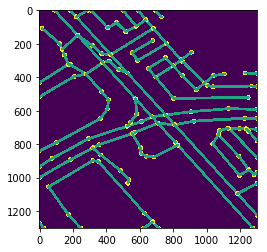

In [174]:
def draw_mask(circle_size,
              line_width,
              ls_list,
              mask_size
             ):

    ls_lines = [(line[len('LINESTRING ('):-1]) for line in ls_list]

    mask = np.zeros((mask_size, mask_size), dtype=np.uint8)
    all_points = []
           
    for line in ls_lines:
        points = line.split(', ')
        points_xy = []
        for point in points:
            x,y = point.split()
            points_xy.append([x,y])
            rr, cc = circle(int(float(y)), int(float(x)), circle_size)
            mask[rr.clip(min=0,max=mask_size-1), cc.clip(min=0,max=mask_size-1)] = 255
        
        all_points.extend(points_xy)
        
        for i,[x,y] in enumerate(points_xy):
            if i-1>-1:
                prev_x = int(float(points_xy[i-1][0]))
                prev_y = int(float(points_xy[i-1][1]))
                mask = cv2.line(mask,(prev_x,prev_y),(int(float(x)),int(float(y))),(150),line_width)
    return mask,all_points

mask,all_points = draw_mask(circle_size=15,
              line_width=15,
              ls_list=ls_list,
              mask_size=1300
             )

plt.imshow(mask)
plt.show()   

In [176]:
set(all_points)

TypeError: unhashable type: 'list'

In [153]:
!ls ../data/AOI_2_Vegas_Roads_Train/PAN_mask/*img1116*

../data/AOI_2_Vegas_Roads_Train/PAN_mask/PAN_AOI_2_Vegas_img1116.jpg


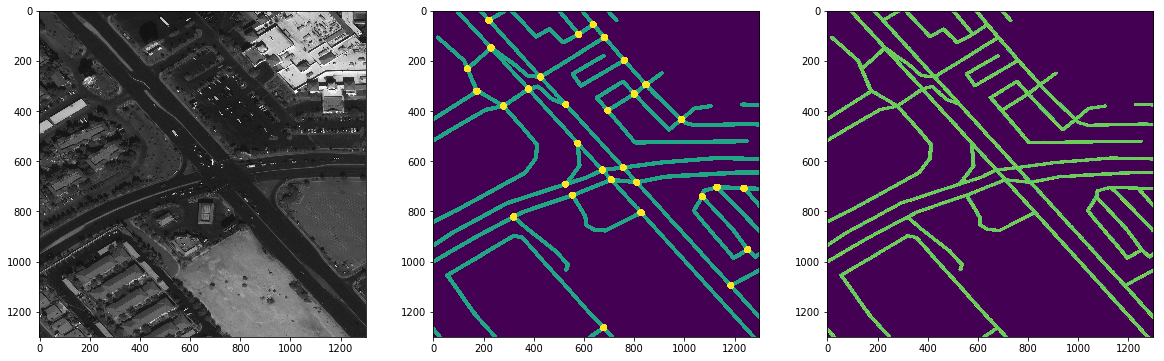

In [201]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 6))

fig.add_subplot(1, 3, 1)
img1 += -img1.min()
img1 *= (1/img1.max())
plt.imshow(img1)

fig.add_subplot(1, 3, 2)
plt.imshow(mask)

fig.add_subplot(1, 3, 3)
plt.imshow(mask2)


plt.show()     

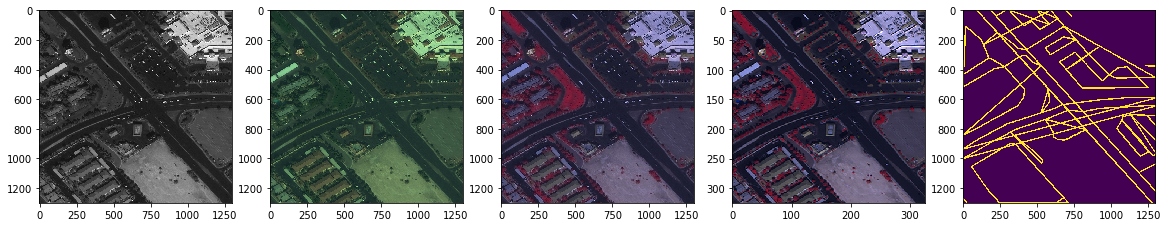

In [143]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(20, 5))

fig.add_subplot(1, 5, 1)
img1 += -img1.min()
img1 *= (1/img1.max())
plt.imshow(img1)

fig.add_subplot(1, 5, 2)
img2 += -img2.min()
img2 *= (1/img2.max())
plt.imshow(img2)

fig.add_subplot(1, 5, 3)
img3 += -img3.min()
img3 *= (1/img3.max())
plt.imshow(img3)

fig.add_subplot(1, 5, 4)
img4 += -img4.min()
img4 *= (1/img4.max())
plt.imshow(img4)

fig.add_subplot(1, 5, 5)
plt.imshow(mask)

plt.show()     

In [69]:
for i,[x,y] in enumerate(points_xy):
    print(i,x,y)

0 1145.53 319.63
1 1142.97 0.00


In [81]:
(int(float(x)),int(float(y)))

(1300, 662)

In [63]:
cc.clip(min=0,max=1300)

array([660, 661, 662, 663, 664, 659, 660, 661, 662, 663, 664, 665, 658,
       659, 660, 661, 662, 663, 664, 665, 666, 658, 659, 660, 661, 662,
       663, 664, 665, 666, 658, 659, 660, 661, 662, 663, 664, 665, 666,
       658, 659, 660, 661, 662, 663, 664, 665, 666, 658, 659, 660, 661,
       662, 663, 664, 665, 666, 659, 660, 661, 662, 663, 664, 665, 660,
       661, 662, 663, 664])

In [60]:
rr, cc

(array([1296, 1296, 1296, 1296, 1296, 1297, 1297, 1297, 1297, 1297, 1297,
        1297, 1298, 1298, 1298, 1298, 1298, 1298, 1298, 1298, 1298, 1299,
        1299, 1299, 1299, 1299, 1299, 1299, 1299, 1299, 1300, 1300, 1300,
        1300, 1300, 1300, 1300, 1300, 1300, 1301, 1301, 1301, 1301, 1301,
        1301, 1301, 1301, 1301, 1302, 1302, 1302, 1302, 1302, 1302, 1302,
        1302, 1302, 1303, 1303, 1303, 1303, 1303, 1303, 1303, 1304, 1304,
        1304, 1304, 1304]),
 array([660, 661, 662, 663, 664, 659, 660, 661, 662, 663, 664, 665, 658,
        659, 660, 661, 662, 663, 664, 665, 666, 658, 659, 660, 661, 662,
        663, 664, 665, 666, 658, 659, 660, 661, 662, 663, 664, 665, 666,
        658, 659, 660, 661, 662, 663, 664, 665, 666, 658, 659, 660, 661,
        662, 663, 664, 665, 666, 659, 660, 661, 662, 663, 664, 665, 660,
        661, 662, 663, 664]))

In [57]:
float('1300.00')

1300.0

In [49]:
points[0].split()

['1145.53', '319.63']

In [38]:
ls_list

['LINESTRING (1300.00 662.42, 1231.00 657.56, 1145.83 659.57, 614.48 673.81, 324.44 677.31, 0.00 691.09)',
 'LINESTRING (314.59 1300.00, 315.13 1229.58, 324.44 677.31, 327.09 327.01, 585.36 325.30, 1145.53 319.63)',
 'LINESTRING (327.09 327.01, 323.18 0.00)',
 'LINESTRING (911.19 1138.18, 611.40 1139.32, 586.99 1116.60, 407.11 1124.05, 380.50 1154.92, 380.50 1221.98, 383.69 1293.29, 387.33 1300.00)',
 'LINESTRING (437.92 1300.00, 474.45 1282.97)',
 'LINESTRING (1145.53 319.63, 1145.83 659.57, 1141.16 1300.00)',
 'LINESTRING (1145.53 319.63, 1142.97 0.00)']

In [31]:
!ls $img1

../data/AOI_2_Vegas_Roads_Train/PAN/PAN_AOI_2_Vegas_img885.tif


In [ ]:
img = read_image(preset,path)

In [ ]:
def 

In [ ]:
import numpy as np
import pandas as pd
import re
import rasterio
from PyQt5.QtGui import QPainter, QColor, QImage, QPolygonF
from PyQt5 import QtCore, QtGui
from PyQt5.QtCore import Qt


data_dir = '../input/SpaceNet_Roads_Sample/AOI_2_Vegas_Roads_Sample/'
roads_data = pd.read_csv(data_dir+'summaryData/AOI_2_Vegas_Roads_Sample.csv')
roads_data.head()

img_id = 'AOI_2_Vegas_img1454'
lines = list(roads_data[roads_data.ImageId == img_id].WKT_Pix)

mask = QImage(1300, 1300, QImage.Format_RGB32)
mask.fill(Qt.black)

painter = QPainter(mask)
pen = QtGui.QPen(Qt.white)
pen.setWidth(16)
pen.setCapStyle(Qt.RoundCap)
painter.setPen(pen)

for i, line in enumerate(lines):
    items = line[len('LINESTRING ('):-1].split(',')
    points = []

    polygon = QPolygonF()
    for item in items:
        x, y = item.split()
        point = [float(x), float(y)]
        points.append(point)
        polygon.append(QtCore.QPointF(point[0], point[1]))
    print(points)
    painter.drawPolyline(polygon)


painter.end()
mask.save(f'mask.png')

# Extend generator so that it works with 8-channel images

In [226]:
torch.randn(1,8,320,320)

4.821369647979736

In [285]:
'mul_ps_8channel' in ['mul_ps_8channel','mul_8channel']

True

In [287]:
len((3,3,3))>2

True

In [267]:
import cv2
import time 
import types
import numpy as np
from numpy import random
import random
import imgaug as ia
from imgaug import augmenters as iaa
from torchvision import transforms
from PIL import Image
import torch

seed = 43

class SatellitesTrainAugmentation(object):
    def __init__(self,
                 shape=1280,
                 aug_scheme=None):
        
        if aug_scheme == True:
            print('Augmentations are enabled for train')
            self.augment = Compose([
                    NpyToPil(),
                    transforms.Scale(shape),
                    PilToNpy(),
                    ImgAugAugs(),            
                    ToTensor(),
                ])
        else:
            print('Augmentations are NOT enabled for train')
            self.augment = Compose([
                    NpyToPil(),
                    transforms.Scale(shape),
                    PilToNpy(),
                    ToTensor(),
                ])            
        
    def __call__(self, img, mask):
        global seed        
        seed = random.randint(0,10000)
        
        # naive solution to working with 8-channel images 
        if img.shape[2]>3:
            img1 = self.augment(img[:,:,0:3]) 
            img2 = self.augment(img[:,:,3:6])
            img2 = self.augment(img[:,:,5:8])
            img = torch.cat((img1[0:3,:,:],img1[0:3,:,:],img1[1:3,:,:]))
        else:
            img = self.augment(img)
        mask = self.augment(mask)        
        return img,mask
class SatellitesTestAugmentation(object):
    def __init__(self,shape=1280):
        self.augment = Compose([
                NpyToPil(),
                transforms.Scale(shape),
                PilToNpy(),            
                ToTensor(),
            ])
    def __call__(self, img, mask):
        return self.augment(img),self.augment(mask)
class ImgAugAugs(object):
    def __call__(self,
                 image):
        global seed        
        ia.seed(seed)
        seq = iaa.Sequential([
            # execute 0 to 1 of the following (less important) augmenters per image
            # don't execute all of them, as that would often be way too strong            
            iaa.Fliplr(0.25), # horizontally flip 25% of all images
            iaa.Flipud(0.25), # vertically flip 25% of all images         
            # Make some images brighter and some darker.
            # In 20% of all cases, we sample the multiplier once per channel,
            # which can end up changing the color of the images.
            iaa.Sometimes(0.25,            
                iaa.Affine(
                    scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
                    translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
                    rotate=(-30, 30),
                    shear=(-5, 5)
                ),   
            ),
        ], random_order=True) # apply augmenters in random order        

        return seq.augment_image(image)    
class Normalize(object):
    def __init__(self,mean,std):
        self.mean = np.array(mean, dtype=np.float32)
        self.std = np.array(std, dtype=np.float32)
    def __call__(self, image):
        image = image.astype(np.float32)
        image[:,:,0:3] -= self.mean
        image[:,:,0:3] *= (1/self.std)
        return image.astype(np.float32)
class Compose(object):
    """Composes several augmentations together.
    Args:
        transforms (List[Transform]): list of transforms to compose.
    Example:
        >>> augmentations.Compose([
        >>>     transforms.CenterCrop(10),
        >>>     transforms.ToTensor(),
        >>> ])
    """

    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, img):
        for t in self.transforms:
            img = t(img)
        return img    
class ToCV2Image(object):
    def __call__(self, tensor):
        return tensor.cpu().numpy().astype(np.float32).transpose((1, 2, 0))
class PilToNpy(object):
    def __call__(self, pil_image):
        return np.array(pil_image)    
class NpyToPil(object):
    def __call__(self, cv2_image):
        return Image.fromarray(cv2_image)  
class ToTensor(object):
    def __call__(self, cvimage):
        # process masks
        if len(cvimage.shape)<3:
            cvimage = np.expand_dims(cvimage, 2)
            cvimage = (cvimage > 255 * 0.5).astype(np.uint8)
            return torch.from_numpy(cvimage).permute(2, 0, 1).float()       
        else:
            # process images
            try:
                return torch.from_numpy(cvimage).permute(2, 0, 1).float().div(float(cvimage.max()))
            except:
                return torch.from_numpy(np.flip(cvimage.transpose((2, 0, 1)),axis=0).copy()).float().div(float(cvimage.max()))
class CannyEdges(object):
    def __init__(self,threshold1=100,threshold2=200):
        self.threshold1 = threshold1
        self.threshold2 = threshold2
    def __call__(self, image):
        canny_region = np.uint8(image[:,:,0:3])
        edges = cv2.Canny(canny_region,self.threshold1,self.threshold2)
        return np.dstack( ( image,edges) ) 
class SaliencyMap(object):
    def __call__(self, image):
        sm = pySaliencyMap(image.shape[0], image.shape[1])
        return np.dstack( ( image,sm.SMGetSM(image)) ) 
class PhotometricDistort(object):
    def __init__(self):
        self.pd = [
            RandomContrast(),
            ConvertColor(transform='HSV'),
            RandomSaturation(),
            RandomHue(),
            ConvertColor(current='HSV', transform='BGR'),
            RandomContrast()
        ]
        self.rand_brightness = RandomBrightness()
        self.rand_light_noise = RandomLightingNoise()

    def __call__(self, image):
        im = image.copy()
        im = self.rand_brightness(im)
        if random.randint(1,2):
            distort = Compose(self.pd[:-1])
        else:
            distort = Compose(self.pd[1:])
        im = distort(im)
        return self.rand_light_noise(im)
class RandomSaturation(object):
    def __init__(self, lower=0.5, upper=1.5):
        self.lower = lower
        self.upper = upper
        assert self.upper >= self.lower, "contrast upper must be >= lower."
        assert self.lower >= 0, "contrast lower must be non-negative."

    def __call__(self, image):
        if random.randint(1,2):
            image[:, :, 1] *= random.uniform(self.lower, self.upper)

        return image
class RandomHue(object):
    def __init__(self, delta=18.0):
        assert delta >= 0.0 and delta <= 360.0
        self.delta = delta

    def __call__(self, image):
        if random.randint(1,2):
            image[:, :, 0] += random.uniform(-self.delta, self.delta)
            image[:, :, 0][image[:, :, 0] > 360.0] -= 360.0
            image[:, :, 0][image[:, :, 0] < 0.0] += 360.0
        return image
class RandomLightingNoise(object):
    def __init__(self):
        self.perms = ((0, 1, 2), (0, 2, 1),
                      (1, 0, 2), (1, 2, 0),
                      (2, 0, 1), (2, 1, 0))

    def __call__(self, image):
        if random.randint(1,2):
            swap = self.perms[random.randint(0,len(self.perms)-1)]
            shuffle = SwapChannels(swap)  # shuffle channels
            image = shuffle(image)
        return image
class ConvertColor(object):
    def __init__(self, current='BGR', transform='HSV'):
        self.transform = transform
        self.current = current

    def __call__(self, image, boxes=None, labels=None):
        if self.current == 'BGR' and self.transform == 'HSV':
            image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        elif self.current == 'HSV' and self.transform == 'BGR':
            image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
        else:
            raise NotImplementedError
        return image
class RandomContrast(object):
    def __init__(self, lower=0.5, upper=1.5):
        self.lower = lower
        self.upper = upper
        assert self.upper >= self.lower, "contrast upper must be >= lower."
        assert self.lower >= 0, "contrast lower must be non-negative."

    # expects float image
    def __call__(self, image):
        if random.randint(1,2):
            alpha = random.uniform(self.lower, self.upper)
            image *= alpha
        return image
class RandomBrightness(object):
    def __init__(self, delta=32):
        assert delta >= 0.0
        assert delta <= 255.0
        self.delta = delta

    def __call__(self, image):
        if random.randint(1,2):
            delta = random.uniform(-self.delta, self.delta)
            image += delta
        return image    
class ConvertFromInts(object):
    def __call__(self, image, boxes=None, labels=None):
        return image.astype(np.float32)
class SwapChannels(object):
    """Transforms a tensorized image by swapping the channels in the order
     specified in the swap tuple.
    Args:
        swaps (int triple): final order of channels
            eg: (2, 1, 0)
    """

    def __init__(self, swaps):
        self.swaps = swaps

    def __call__(self, image):
        """
        Args:
            image (Tensor): image tensor to be transformed
        Return:
            a tensor with channels swapped according to swap
        """
        # if torch.is_tensor(image):
        #     image = image.data.cpu().numpy()
        # else:
        #     image = np.array(image)
        image = image[:, :, self.swaps]
        return image

In [268]:
# custom classes
from SatellitesDataset import get_test_dataset,get_train_dataset,SatellitesDataset
from Loss import BCEDiceLoss
from LinkNet import LinkNet34
from UNet import UNet11
from presets import preset_dict

preset = 'mul_ps_8channel'
bit8_imgs,bit8_masks,cty_no = get_train_dataset(preset,preset_dict)
or_imgs,cty_no_mask = get_test_dataset(preset,preset_dict)
len(bit8_imgs),len(bit8_masks),len(cty_no),len(or_imgs),len(cty_no_mask)

from sklearn.model_selection import train_test_split

train_imgs, val_imgs, train_masks, val_masks = train_test_split(bit8_imgs,
                                                                bit8_masks,
                                                                test_size=0.2,
                                                                stratify = cty_no,
                                                                random_state=42)

len(train_imgs),len(train_masks)

train_augs = SatellitesTrainAugmentation(shape=1280,
                                         aug_scheme = True
                                        )

val_augs = SatellitesTestAugmentation(shape=1280)

dataset = SatellitesDataset(preset = preset_dict[preset],
            image_paths = train_imgs,
             mask_paths = train_masks,                 
             transforms = train_augs,
            )

img,mask  = dataset.__getitem__(random.randint(0,100))


Augmentations are enabled for train


In [269]:
img.shape

torch.Size([8, 1280, 1280])

In [237]:
img.max()

1.0

start
image processing complete 0.5210919380187988


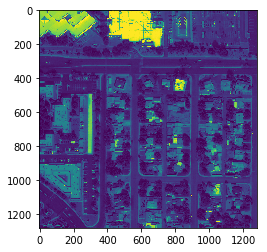

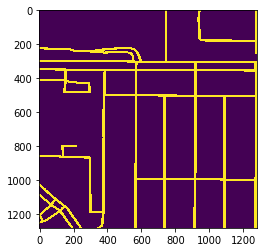

plotting complete 0.8657972812652588


In [284]:
import matplotlib.pyplot as plt
import time
import random
import numpy as np

start = time.time()
print("start")

img,mask  = dataset.__getitem__(random.randint(0,100))

end = time.time()
print('image processing complete', end - start)

img = img.cpu().numpy().astype(np.float32).transpose((1, 2, 0))[:,:,6]
img += -img.min()
img *= (1/img.max())

plt.imshow(img)
plt.show()

mask = mask.cpu().numpy().astype(np.float32).transpose((1, 2, 0))[:,:,0]
mask += -mask.min()
mask *= (1/mask.max())

plt.imshow(mask)
plt.show()

end = time.time()
print('plotting complete', end - start)

# Extract various road types from geojson files

## See what we have

In [54]:
import time
from osmnx.utils import log
from osmnx import core
import networkx as nx
import geopandas as gpd
from shapely.geometry import (Point)
                            #, LineString, MultiLineString, 
                            #  Polygon, MultiPolygon)
import numpy as np
import fiona
import shapely.geometry

###############################################################################
def parse_OGR_nodes_paths(vectorFileName, osmidx=0, osmNodeidx = 0,
                          nodeListGpd=gpd.GeoDataFrame(),
                          valid_road_types=set([]), verbose=True,
                          roadTypeField='type'):
    """
    Construct dicts of nodes and paths with key=osmid and value=dict of attributes.

    Parameters
    ----------
    vectorFileName : absolute path to vector file supported by OGR that has line segments
        JSON response from from the Overpass API

    Returns
    -------
    nodes, paths : tuple
    
    valid_road_types is a set of road types to be allowed
    """


    #dataSource = ogr.Open(vectorFileName, 0)

    with fiona.open(vectorFileName, 'r') as source:
        #layer = dataSource.GetLayer()
        nodes = {}
        paths = {}
        for feature in source:

            geom = feature['geometry']
            properties = feature['properties']
            ## todo create more adjustable filter
            if roadTypeField in properties:
                road_type = properties['type']
            elif 'highway' in properties:
                road_type = properties['highway']            
            elif 'road_type' in properties:
                road_type = properties['road_type']  
            else:
                road_type = 'None'
            
            if verbose:
                print("\ngeom:", geom)
                print("   properties:", properties)
                print("   road_type:", road_type)
                
            ##################
            # check if road type allowable, continue if not
            # first check if road
            if (len(valid_road_types) > 0) and \
                      (geom['type'] == 'LineString' or geom['type'] == 'MultiLineString'):
                if road_type not in valid_road_types:
                    if verbose:
                        print("Invalid road type, skipping...")
                    continue
            ###################
            
            # skip empty linestrings
            if 'LINESTRING EMPTY' in properties.values():
                continue
            
            osmidx = osmidx + 1

            if geom['type']=='LineString':
                #print osmNodeidx
                lineString = shapely.geometry.shape(geom)
                #if len(geom['coordinates']) == 0:
                #    continue
                path, nodeList, osmNodeidx, nodeListGpd = processLineStringFeature(lineString,
                                                                       osmidx,
                                                                       osmNodeidx,
                                                                       nodeListGpd,
                                                                       properties=properties)
                #print(nodeListGpd.head())
                osmNodeidx = osmNodeidx+1
                osmidx = osmidx+1
                nodes.update(nodeList)
                paths[osmidx] = path
                #print(geom.GetGeometryName())

            elif geom['type'] == 'MultiLineString':
                for linestring in shapely.geometry.shape(geom):

                    path, nodeList, osmNodeidx, nodeListGpd = processLineStringFeature(linestring,
                                                                                       osmidx,
                                                                                       osmNodeidx,
                                                                                       nodeListGpd,
                                                                                       properties=properties)
                    osmNodeidx = osmNodeidx + 1
                    osmidx = osmidx+1
                    #print(geom.GetGeometryName())
                    nodes.update(nodeList)
                    paths[osmidx] = path

    return nodes, paths

###############################################################################
def processLineStringFeature(lineString, keyEdge, osmNodeidx, 
                             nodeListGpd=gpd.GeoDataFrame(), properties={},
                             roadTypeField='type'):
    # iterage over points in LineString
    
    osmNodeidx = osmNodeidx + 1
    path = {}
    nodes = {}
    path['osmid'] = keyEdge

    nodeList = []
    for point in lineString.coords:

        pointShp = shapely.geometry.shape(Point(point))
        if nodeListGpd.size == 0:
            nodeId = np.array([])
        else:
            #print(nodeListGpd.head())
            #print(point)
            nodeId=nodeListGpd[nodeListGpd.distance(pointShp) == 0.0]['osmid'].values

        if nodeId.size == 0:
            nodeId = osmNodeidx
            nodeListGpd = nodeListGpd.append({'geometry': pointShp, 'osmid': osmNodeidx}, ignore_index=True)
            osmNodeidx = osmNodeidx + 1

            node = {}
            # add properties
            node['x'] = point[0]
            node['y'] = point[1]
            node['osmid'] = nodeId
            
            # add properties
            for key,value in properties.items():
                node[key] = value
            if roadTypeField in properties:
                node['highway'] = properties['type']
            else:
                node['highway'] = 'unclassified'

            nodes[nodeId] = node

        else:
            nodeId = nodeId[0]

        nodeList.append(nodeId)


    path['nodes'] = nodeList
    # add properties
    for key,value in properties.items():
        path[key] = value
    # also set 'highway' flag
    if roadTypeField in properties:
        path['highway'] = properties['type']
    else:
        path['highway'] = 'unclassified'


    return path, nodes, osmNodeidx, nodeListGpd

###############################################################################
def create_graphGeoJson(geoJson, name='unnamed', retain_all=True, 
                        network_type='all_private', valid_road_types=set([]),
                        roadTypeField='type',
                        verbose=True, osmidx=0, osmNodeidx=0):
    """
    Create a networkx graph from OSM data.

    Parameters
    ----------
    geoJson : geoJsonFile Name
        will support any file format supported by OGR
    name : string
        the name of the graph
    retain_all : bool
        if True, return the entire graph even if it is not connected
    network_type : string
        what type of network to create

    Returns
    -------
    networkx multidigraph
    """

    log('Creating networkx graph from downloaded OSM data...')
    start_time = time.time()

    # make sure we got data back from the server requests


    # create the graph as a MultiDiGraph and set the original CRS to EPSG 4326
    G = nx.MultiDiGraph(name=name, crs={'init':'epsg:4326'})

    # extract nodes and paths from the downloaded osm data
    nodes = {}
    paths = {}

    nodes_temp, paths_temp = parse_OGR_nodes_paths(geoJson, 
                                                   valid_road_types=valid_road_types,
                                                   verbose=verbose,
                                                   osmidx=osmidx, osmNodeidx=osmNodeidx,
                                                   roadTypeField=roadTypeField)

    if len(nodes_temp)==0:
        return G
    if verbose:
        print("nodes_temp:", nodes_temp)
        print("paths_temp:", paths_temp)
        
    for key, value in list(nodes_temp.items()):
        nodes[key] = value
        if verbose:
            print("node key:", key)
            print("  node value:", value)
    for key, value in list(paths_temp.items()):
        paths[key] = value
        if verbose:
            print("path key:", key)
            print("  path value:", value)
    # add each osm node to the graph
    for node, data in list(nodes.items()):
        G.add_node(node, **data)

    # add each osm way (aka, path) to the graph
    if verbose:
        print("paths:", paths)
    G = core.add_paths(G, paths, network_type)

    # retain only the largest connected component, if caller did not set retain_all=True
    if not retain_all:
        G = core.get_largest_component(G)

    log('Created graph with {:,} nodes and {:,} edges in {:,.2f} seconds'.format(len(list(G.nodes())), len(list(G.edges())), time.time()-start_time))

    # add length (great circle distance between nodes) attribute to each edge to use as weight
    G = core.add_edge_lengths(G)



In [ ]:
create_graphGeoJson(geoJson)

In [13]:
import glob as glob

imgs = []

# change this to your data prefix
path_prefix = '../data'

# only train folders
folders = ['AOI_2_Vegas_Roads_Train',
           'AOI_5_Khartoum_Roads_Train',
           'AOI_3_Paris_Roads_Train',
           'AOI_4_Shanghai_Roads_Train']

# image types
prefix_dict = {
    'mul': 'MUL',
    'muls': 'MUL-PanSharpen',
    'pan': 'PAN',
    'rgbps': 'RGB-PanSharpen',    
}

for folder in folders:
    for prefix in prefix_dict.items():
        g = glob.glob(path_prefix+'/{}/{}/*.tif'.format(folder,prefix[1]))
        imgs.extend(g)
        
img_folders = [(img.split('/')[2]) for img in imgs]
img_subfolders = [(img.split('/')[3]) for img in imgs]   
img_files = [(img.split('/')[4]) for img in imgs]  

In [22]:
len(img_files)

11120

In [23]:
import os 

label_file = os.path.join(path_prefix,img_folders[666],'geojson/spacenetroads','spacenetroads_AOI'+img_files[666].split('AOI')[1][0:-3]+'geojson')

In [24]:
!ls $label_file

../data/AOI_2_Vegas_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_2_Vegas_img1525.geojson


In [20]:
import json
from pprint import pprint

data = json.load(open(label_file))

pprint(data)

{'crs': {'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'},
         'type': 'name'},
 'features': [{'geometry': {'coordinates': [[-115.1987076, 36.25741195509],
                                            [-115.19851363478, 36.25741195509],
                                            [-115.19845365423, 36.25741195509],
                                            [-115.19796095687, 36.25739813612]],
                            'type': 'LineString'},
               'properties': {'bridge_typ': '2',
                              'heading': '0',
                              'lane_numbe': '2',
                              'lane_number': '2',
                              'one_way_ty': '2',
                              'origarea': 0,
                              'origlen': 0.008698178566584449,
                              'partialDec': 1,
                              'paved': '1',
                              'road_id': 18471,
                              'road_type': '5',
  

In [53]:
data['features'][0]['geometry']['coordinates']

[[-115.1987076, 36.25741195509],
 [-115.19851363478, 36.25741195509],
 [-115.19845365423, 36.25741195509],
 [-115.19796095687, 36.25739813612]]

In [56]:
data['features'][0]['properties']['lane_number']
data['features'][0]['properties']['paved']
data['features'][0]['properties']['road_type']

'5'

In [32]:
data['features'][0]['properties']

{'bridge_typ': '2',
 'heading': '0',
 'lane_numbe': '2',
 'lane_number': '2',
 'one_way_ty': '2',
 'origarea': 0,
 'origlen': 0.008698178566584449,
 'partialDec': 1,
 'paved': '1',
 'road_id': 18471,
 'road_type': '5',
 'truncated': 0}

In [38]:
!ls ../data/AOI_4_Shanghai_Roads_Train/geojson

spacenetroads


In [36]:
path_prefix+'/{}/geojson/*.geojson'.format(folder)

'../data/AOI_4_Shanghai_Roads_Train/geojson/*.geojson'

In [49]:
geojson_files = []
for folder in folders:
    g = glob.glob(path_prefix+'/{}/geojson/spacenetroads/*.geojson'.format(folder))
    geojson_files.extend(g)
    
geo_json_df = pd.DataFrame()
geo_json_df['img_id'] = img_ids
geo_json_df['geojson_path'] = geojson_files    

In [43]:
import pandas as pd

df = pd.read_csv('../metadata.csv')
df.head()

Unnamed: 0  width  height  channels  im_size         ctime         mtime  \
0           0   1300    1300         1  3383838  1.515131e+09  1.511274e+09   
1           1   1300    1300         1  3383838  1.515131e+09  1.511274e+09   
2           2   1300    1300         1  3383838  1.515131e+09  1.511274e+09   
3           3   1300    1300         1  3383838  1.515131e+09  1.511274e+09   
4           4   1300    1300         1  3383838  1.515131e+09  1.511274e+09   

                       img_files img_folders               img_subfolders  
0  AOI_2_Vegas_Roads_Test_Public         PAN  PAN_AOI_2_Vegas_img1510.tif  
1  AOI_2_Vegas_Roads_Test_Public         PAN   PAN_AOI_2_Vegas_img338.tif  
2  AOI_2_Vegas_Roads_Test_Public         PAN  PAN_AOI_2_Vegas_img1468.tif  
3  AOI_2_Vegas_Roads_Test_Public         PAN   PAN_AOI_2_Vegas_img857.tif  
4  AOI_2_Vegas_Roads_Test_Public         PAN    PAN_AOI_2_Vegas_img86.tif

In [47]:
img_ids = [('img'+file.split('_img')[1][:-len('.geojson')] )for file in geojson_files]

In [59]:
def process_geojson(geojson):
    linestring = geojson['features'][0]['geometry']['coordinates']
    lane_number = geojson['features'][0]['properties']['lane_number']
    paved = geojson['features'][0]['properties']['paved']
    road_type = geojson['features'][0]['properties']['road_type']
    return linestring,lane_number,paved,road_type

In [41]:
len(geojson_files)

2780

In [60]:
import json
from pprint import pprint

data = json.load(open(geojson_files[0]))
linestring,lane_number,paved,road_type = process_geojsons(data)


In [61]:
linestring,lane_number,paved,road_type

([[-115.2302976, 36.13671528660451],
  [-115.22952784383, 36.13671025795],
  [-115.22729652201, 36.13669630622],
  [-115.2267876, 36.136693062408064]],
 '2',
 '1',
 '5')

## Extract meta-data

In [14]:
img_ids = [(file.split('spacenetroads_')[1][:-len('.geojson')] )for file in geojson_files]

In [15]:
img_ids[0]

'AOI_2_Vegas_img738'

In [10]:
img_ids[0]

'img738'

In [1]:
import json
from pprint import pprint
import glob
import os
import pandas as pd

# only train folders
folders = ['AOI_2_Vegas_Roads_Train',
           'AOI_5_Khartoum_Roads_Train',
           'AOI_3_Paris_Roads_Train',
           'AOI_4_Shanghai_Roads_Train']

path_prefix = '../data'

geojson_files = []
for folder in folders:
    g = glob.glob(path_prefix+'/{}/geojson/spacenetroads/*.geojson'.format(folder))
    geojson_files.extend(g)

img_ids = [(file.split('spacenetroads_')[1][:-len('.geojson')] )for file in geojson_files]
geo_json_df = pd.DataFrame()

def process_geojson(geojson,img_id,path):
    tmp_df = pd.DataFrame()
    
    linestrings = []
    lane_numbers = []
    paveds = []
    road_types = []

    for feature in geojson['features']:
        linestring = feature['geometry']['coordinates']
        lane_number = feature['properties']['lane_number']
        paved = feature['properties']['paved']
        road_type = feature['properties']['road_type']

        lane_numbers.append(lane_number)
        linestrings.append(linestring)
        paveds.append(paved)
        road_types.append(road_type)        
   
    tmp_df['linestring'] = linestrings
    tmp_df['lane_number'] = lane_numbers
    tmp_df['paved'] = paveds
    tmp_df['road_type'] = road_types
    tmp_df['img_id'] = img_id
    tmp_df['geojson_path'] = path   
    
    return tmp_df

for path,img_id in zip(geojson_files,img_ids):
    try:
        geojson = json.load(open(path))
        tmp_df = process_geojson(geojson,img_id,path)
        geo_json_df = geo_json_df.append(tmp_df)
        del tmp_df
    except:
        print(path)

geo_json_df.to_csv('geojson_df_full.csv')

../data/AOI_2_Vegas_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_2_Vegas_img42.geojson
../data/AOI_2_Vegas_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_2_Vegas_img1488.geojson
../data/AOI_2_Vegas_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_2_Vegas_img1448.geojson
../data/AOI_2_Vegas_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_2_Vegas_img234.geojson
../data/AOI_2_Vegas_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_2_Vegas_img1534.geojson
../data/AOI_2_Vegas_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_2_Vegas_img1159.geojson
../data/AOI_2_Vegas_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_2_Vegas_img200.geojson
../data/AOI_2_Vegas_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_2_Vegas_img286.geojson
../data/AOI_3_Paris_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_3_Paris_img402.geojson
../data/AOI_3_Paris_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_3_Paris_img233.geojson
../data/AOI_3_Paris_Roads_Train/geojson/spacene

../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img1596.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img713.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img1131.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img272.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img1746.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img1956.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img237.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img1703.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img131.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_

../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img1747.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img1953.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img769.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img355.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img1386.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img773.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img881.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img1987.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_img538.geojson
../data/AOI_4_Shanghai_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_4_Shanghai_i

In [2]:
geo_json_df.iloc[1000:1010].head()

linestring lane_number paved  \
9   [[-115.2951966092, 36.14489301076], [-115.2948...           1     1   
10  [[-115.29455772307708, 36.1458476998], [-115.2...           2     1   
11  [[-115.29405731782, 36.1458476998], [-115.2934...           2     1   
12  [[-115.29423924952, 36.14288531098], [-115.294...           1     1   
13  [[-115.29467354976, 36.14345878576], [-115.294...           1     1   

   road_type             img_id  \
9          6  AOI_2_Vegas_img93   
10         5  AOI_2_Vegas_img93   
11         5  AOI_2_Vegas_img93   
12         6  AOI_2_Vegas_img93   
13         6  AOI_2_Vegas_img93   

                                         geojson_path  
9   ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
10  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
11  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
12  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
13  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...

In [1]:
import json
from pprint import pprint
import glob
import os
import pandas as pd

# only train folders
folders = ['AOI_2_Vegas_Roads_Train',
           'AOI_5_Khartoum_Roads_Train',
           'AOI_3_Paris_Roads_Train',
           'AOI_4_Shanghai_Roads_Train']

path_prefix = '../data'

geojson_files = []
for folder in folders:
    g = glob.glob(path_prefix+'/{}/geojson/spacenetroads/*.geojson'.format(folder))
    geojson_files.extend(g)

img_ids = [('img'+file.split('_img')[1][:-len('.geojson')] )for file in geojson_files]

geojson = json.load(open(geojson_files[1500]))
geojson

{'crs': {'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'},
  'type': 'name'},
 'features': [{'geometry': {'coordinates': [[2.24136680201, 49.04783134811],
     [2.24115212612, 49.04750156346],
     [2.24090039071, 49.04700583835],
     [2.24081639995, 49.046853516122]],
    'type': 'LineString'},
   'properties': {'bridge_typ': '2',
    'heading': '0',
    'lane_numbe': '2',
    'lane_number': '2',
    'one_way_ty': '2',
    'origarea': 0,
    'origlen': 0.01386850385017665,
    'partialDec': 1,
    'paved': '1',
    'road_id': 3201,
    'road_type': '4',
    'truncated': 0},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[2.24136680201, 49.04783134811],
     [2.24147699257, 49.04794902736],
     [2.24167704729, 49.04813731415],
     [2.24193808125, 49.04836090472],
     [2.24213813597, 49.04857058774]],
    'type': 'LineString'},
   'properties': {'bridge_typ': '2',
    'heading': '0',
    'lane_numbe': '2',
    'lane_number': '2',
    'one_way_ty': '2',
    'origarea':

In [12]:
len(geojson['features'])

46

In [7]:
geo_json_df.road_type.value_counts()

5    22923
6    21777
3     5059
2     3105
7     1464
1      992
4      931
Name: road_type, dtype: int64

In [8]:
geo_json_df.paved.value_counts()

1    44420
2    11831
Name: paved, dtype: int64

In [9]:
geo_json_df.lane_number.value_counts()

2     39200
1     13304
4      1692
3      1427
6       311
5       259
8        28
7        22
12        6
10        2
Name: lane_number, dtype: int64

In [14]:
geo_json_df[geo_json_df.lane_number==-1].shape



(231, 6)

In [15]:
geo_json_df.road_type.value_counts()

6     967
5     940
3     321
-1    231
2     163
1      57
4      51
7      50
Name: road_type, dtype: int64

In [16]:
geo_json_df.paved.value_counts()

1     2119
2      430
-1     231
Name: paved, dtype: int64

In [17]:
geo_json_df.lane_number.value_counts()

2     1815
1      500
-1     231
4      119
3       69
6       32
5       13
7        1
Name: lane_number, dtype: int64

## See which type means what

In [1]:
import os
import pandas as pd
from presets import preset_dict

data_prefix = '../data'

folders = ['AOI_2_Vegas_Roads_Train',
           'AOI_5_Khartoum_Roads_Train',
           'AOI_3_Paris_Roads_Train',
           'AOI_4_Shanghai_Roads_Train']

# load all of the linestrings together
ls_df = pd.DataFrame()
for folder in folders:
    ls_path = os.path.join(data_prefix,folder,'summaryData',folder+'.csv')
    ls_df = ls_df.append(pd.read_csv(ls_path))
    
ls_df['img_id'] = ls_df['ImageId'].apply(lambda x: 'img'+x.split('_img')[1] )

geojson_df = pd.read_csv('geojson_df_full.csv')
meta_df = pd.read_csv('../metadata.csv')

In [23]:
table = pd.pivot_table(geojson_df,
                       index=["paved"],
                       columns = ['lane_number'],
                       values=["geojson_path"],
                       aggfunc={len},
                       fill_value=0)
table

geojson_path                                           
                     len                                           
lane_number           1      2     3     4    5    6   7   8  10 12
paved                                                              
1                   9023  31715  1416  1642  258  308  22  28  2  6
2                   4281   7485    11    50    1    3   0   0  0  0

In [99]:
# manual curation of the dataset
# all unpaved roads with 2+ lanes set to paved

geojson_df.loc[(geojson_df.lane_number>2)&(geojson_df.paved == 2),'paved'] = 1

In [100]:
table = pd.pivot_table(geojson_df,
                       index=["paved"],
                       columns = ['lane_number'],
                       values=["geojson_path"],
                       aggfunc={len},
                       fill_value=0)
table

geojson_path                                           
                     len                                           
lane_number           1      2     3     4    5    6   7   8  10 12
paved                                                              
1                   9023  31715  1427  1692  259  311  22  28  2  6
2                   4281   7485     0     0    0    0   0   0  0  0

In [155]:
geojson_df[geojson_df.lane_number==12]

Unnamed: 0                                         linestring  \
33991           9  [[121.66053645153225, 31.3189659], [121.660580...   
34891          35  [[121.60377872511, 31.33318715007], [121.60389...   
40890           4  [[121.65267673624, 31.32273894198], [121.65291...   
41433          22  [[121.65972775108, 31.31782691008], [121.66036...   
45426           4  [[121.65356541188, 31.32399753009], [121.65376...   
55916          10  [[121.6603692, 31.318730339590942], [121.66053...   

       lane_number  paved  road_type                 img_id  \
33991           12      1          3  AOI_4_Shanghai_img824   
34891           12      1          6  AOI_4_Shanghai_img123   
40890           12      1          3  AOI_4_Shanghai_img651   
41433           12      1          3  AOI_4_Shanghai_img763   
45426           12      1          3  AOI_4_Shanghai_img705   
55916           12      1          3  AOI_4_Shanghai_img823   

                                            geojson_path  
33991  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
34891  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
40890  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
41433  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
45426  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
55916  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...

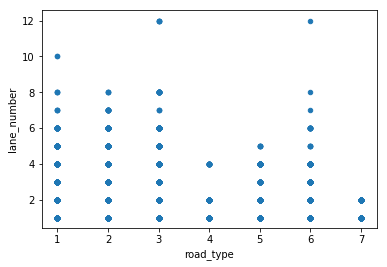

In [71]:
geojson_df.plot.scatter(x='road_type', y='lane_number')
plt.show()

In [2]:
table = pd.pivot_table(geojson_df,
                       index=["road_type","paved"],
                       columns = ['lane_number'],
                       values=["geojson_path"],
                       aggfunc={len},
                       fill_value=0)
table

geojson_path                                         
                         len                                         
lane_number               1      2    3    4    5    6   7   8  10 12
road_type paved                                                      
1         1              185    376  140  131  100   26   4   4  2  0
          2                0      7    0   15    0    2   0   0  0  0
2         1              173   1388  873  464   43  122  14   4  0  0
          2                5     10    4    4    0    1   0   0  0  0
3         1              426   3149  295  856  104  148   3  19  0  5
          2               14     29    2    8    1    0   0   0  0  0
4         1               95    481    0    8    0    0   0   0  0  0
          2               38    302    0    7    0    0   0   0  0  0
5         1             2958  13568   24  128    6    0   0   0  0  0
          2             1734   4498    3    4    0    0   0   0  0  0
6         1             5169  12735   84   55    5   12   1   1  0  1
          2             1861   1839    2   12    0    0   0   0  0  0
7         1               17     18    0    0    0    0   0   0  0  0
          2              629    800    0    0    0    0   0   0  0  0

In [280]:
import rasterio
import ast
import numpy as np
from skimage.io import imread
from skimage import img_as_ubyte,img_as_float
from skimage import exposure
from skimage.draw import circle
import cv2
from collections import Counter
import matplotlib.pyplot as plt
from collections import Sequence
from itertools import chain, count

# a function to understand list depth
def depth(seq):
    for level in count():
        if not seq:
            return level
        seq = list(chain.from_iterable(s for s in seq if isinstance(s, Sequence)))

def read_image(preset,path):
    img = imread(path)
    target_channels = np.zeros(shape=(preset['width'],preset['width'],len(preset['channels'])))

    # expand grayscale images to 3 dimensions
    if len(img.shape)<3:
        img = np.expand_dims(img, 2)                

    for i,channel in enumerate(preset['channels']):
        target_channels[:,:,i] = img[:,:,channel-1]

    # target_channels = img_as_ubyte(target_channels)
    # target_channels = exposure.rescale_intensity(target_channels, in_range='uint8')           

    return target_channels
    
def draw_mask(circle_size,
              line_width,
              ls_list,
              mask_size
             ):

    mask = np.zeros((mask_size, mask_size), dtype=np.uint8)
    all_points = []
    
    for line in ls_list:

        points_xy = line
        
        all_points.extend(points_xy)
        
        for i,[x,y] in enumerate(points_xy):
            if i-1>-1:
                prev_x = int(float(points_xy[i-1][0]))
                prev_y = int(float(points_xy[i-1][1]))
                mask = cv2.line(mask,(prev_x,prev_y),(int(float(x)),int(float(y))),(150),line_width)
                
        all_points_text = [(str(point[0])+' '+str(point[1])) for point in all_points]
        count_dict =  Counter(all_points_text)

        for key, value in count_dict.items():
            if(value>1):
                x,y = key.split()
                rr, cc = circle(int(float(y)), int(float(x)), circle_size)
                mask[rr.clip(min=0,max=mask_size-1), cc.clip(min=0,max=mask_size-1)] = 255
    return mask

def draw_mask_width(
              ls_list,
              mask_size
             ):

    width_per_lane = 10
    mask = np.zeros((mask_size, mask_size), dtype=np.uint8)
    all_points = []
    
    for line in ls_list:

        points_xy = line
        all_points.extend(points_xy)
        
        for i,[x,y,lanes] in enumerate(points_xy):
            if i-1>-1:
                prev_x = int(float(points_xy[i-1][0]))
                prev_y = int(float(points_xy[i-1][1]))
                mask = cv2.line(mask,(prev_x,prev_y),
                                (int(float(x)),int(float(y))),
                                (255),
                                lanes*width_per_lane)
    return mask

def draw_intersections(circle_size,
              ls_list,
              mask_size
             ):

    mask = np.zeros((mask_size, mask_size), dtype=np.uint8)
    all_points = []
    
    for line in ls_list:
        points_xy = line
        all_points.extend(points_xy)
        all_points_text = [(str(point[0])+' '+str(point[1])) for point in all_points]
        count_dict =  Counter(all_points_text)
        
        for key, value in count_dict.items():
            if(value>1):
                x,y = key.split()
                rr, cc = circle(int(float(y)), int(float(x)), circle_size)
                mask[rr.clip(min=0,max=mask_size-1), cc.clip(min=0,max=mask_size-1)] = 255
    return mask

def draw_masks(paved = 2,
               road_type = 6,
               lane_number = 6):
    
    random_image = geojson_df[(geojson_df.paved == paved)
                              # &(geojson_df.road_type == road_type)
                              &(geojson_df.lane_number == lane_number)].sample(n=1).img_id.values[0]

    sample_df = geojson_df[(geojson_df.paved == paved)
              # &(geojson_df.road_type == road_type)
              &(geojson_df.lane_number == lane_number)
              &(geojson_df.img_id == random_image)]
    
    rgb_ps_image = os.path.join(data_prefix, meta_df[(meta_df.img_subfolders.str.contains(random_image))
                                                     &(meta_df.img_folders=='RGB-PanSharpen')].img_files.values[0],
                                                    'RGB-PanSharpen',
                                                    meta_df[(meta_df.img_subfolders.str.contains(random_image))
                                                            &(meta_df.img_folders=='RGB-PanSharpen')].img_subfolders.values[0])

    mask2_path = os.path.join(data_prefix, meta_df[(meta_df.img_subfolders.str.contains(random_image))
                                                     &(meta_df.img_folders=='RGB-PanSharpen')].img_files.values[0],
                                                    'RGB-PanSharpen_mask',
                                                    meta_df[(meta_df.img_subfolders.str.contains(random_image))
                                                            &(meta_df.img_folders=='RGB-PanSharpen')].img_subfolders.values[0])[:-3]+'jpg'


    src = rasterio.open(rgb_ps_image)
    ls_list = [ast.literal_eval(ls) for ls in sample_df.linestring.values]
    ls_list_image = []

    for line in ls_list:
        points = []
        for point in line:
            points.append(~src.affine * (point[0],point[1]))
        ls_list_image.append(points)

    img = read_image(preset_dict['rgb_ps'],rgb_ps_image)

    mask = draw_mask(circle_size=15,
                  line_width=15,
                  ls_list=ls_list_image,
                  mask_size=1300
                 )

    mask2 = imread(mask2_path)

    fig=plt.figure(figsize=(20, 6))

    fig.add_subplot(1, 3, 1)
    img += -img.min()
    img *= (1/img.max())
    plt.imshow(img)

    fig.add_subplot(1, 3, 2)
    plt.imshow(mask)

    fig.add_subplot(1, 3, 3)
    plt.imshow(mask2)

    plt.show()     
    
def draw_masks_analyze_road_types():
    road_types = [3,5,6,7]    
    
    # select a random image and the gt
    random_image = geojson_df.sample(n=1).img_id.values[0]
    
    mask2_path = os.path.join(data_prefix, meta_df[(meta_df.img_subfolders.str.contains(random_image))
                                                     &(meta_df.img_folders=='RGB-PanSharpen')].img_files.values[0],
                                                    'RGB-PanSharpen_mask',
                                                    meta_df[(meta_df.img_subfolders.str.contains(random_image))
                                                            &(meta_df.img_folders=='RGB-PanSharpen')].img_subfolders.values[0])[:-3]+'jpg'
    
    mask2 = imread(mask2_path)    
    
    rgb_ps_image = os.path.join(data_prefix, meta_df[(meta_df.img_subfolders.str.contains(random_image))
                                                     &(meta_df.img_folders=='RGB-PanSharpen')].img_files.values[0],
                                                    'RGB-PanSharpen',
                                                    meta_df[(meta_df.img_subfolders.str.contains(random_image))
                                                            &(meta_df.img_folders=='RGB-PanSharpen')].img_subfolders.values[0])
    
    fig=plt.figure(figsize=(25, 10))
    
    img = read_image(preset_dict['rgb_ps'],rgb_ps_image)    
    fig.add_subplot(2, 5, 1)
    img += -img.min()
    img *= (1/img.max())
    plt.imshow(img)
    
    fig.add_subplot(2, 5, 6)
    plt.imshow(mask2)    
    
    for i,road_type in enumerate(road_types):
       
        sample_df = geojson_df[((geojson_df.road_type == road_type)
                                &(geojson_df.img_id == random_image))]

        src = rasterio.open(rgb_ps_image)
        ls_list = [ast.literal_eval(ls) for ls in sample_df.linestring.values]
        ls_list_image = []

        for line in ls_list:
            points = []
            for point in line:
                points.append(~src.affine * (point[0],point[1]))
            ls_list_image.append(points)

        mask = draw_mask(circle_size=15,
                      line_width=15,
                      ls_list=ls_list_image,
                      mask_size=1300
                     )

        fig.add_subplot(2, 5, i+2)
        plt.imshow(mask)

    plt.show()
 
def process_ls(sample_df,lane_numbers):
    if lane_numbers == None:
        ls_list = []
        for ls in sample_df.linestring.values:
            if depth(ast.literal_eval(ls)) == 2:
                ls_list.append(ast.literal_eval(ls))
            elif depth(ast.literal_eval(ls)) == 3:
                for item in ast.literal_eval(ls):
                    ls_list.append(item)
            else:
                raise ValueError('Wrong linestring format')
        return ls_list,None
    else:
        ls_list = []
        lane_numbers_new = []
        
        i = 0
        for ls in sample_df.linestring.values:
            if depth(ast.literal_eval(ls)) == 2:
                ls_list.append(ast.literal_eval(ls))
                lane_numbers_new.append(lane_numbers[i])
            elif depth(ast.literal_eval(ls)) == 3:
                for item in ast.literal_eval(ls):
                    ls_list.append(item)
                    lane_numbers_new.append(lane_numbers[i])
            else:
                raise ValueError('Wrong linestring format')
            i+=1
        return ls_list,lane_numbers_new
        
def draw_masks_new():
    paved_types = [1,2]
    
    # select a random image and the gt
    random_image = geojson_df.sample(n=1).img_id.values[0]
    # random_image = 'AOI_4_Shanghai_img823'
    
    mask2_path = os.path.join(data_prefix, meta_df[(meta_df.img_subfolders.str.contains(random_image))
                                                     &(meta_df.img_folders=='RGB-PanSharpen')].img_files.values[0],
                                                    'RGB-PanSharpen_mask',
                                                    meta_df[(meta_df.img_subfolders.str.contains(random_image))
                                                            &(meta_df.img_folders=='RGB-PanSharpen')].img_subfolders.values[0])[:-3]+'jpg'
    
    mask2 = imread(mask2_path)    
    
    rgb_ps_image = os.path.join(data_prefix, meta_df[(meta_df.img_subfolders.str.contains(random_image))
                                                     &(meta_df.img_folders=='RGB-PanSharpen')].img_files.values[0],
                                                    'RGB-PanSharpen',
                                                    meta_df[(meta_df.img_subfolders.str.contains(random_image))
                                                            &(meta_df.img_folders=='RGB-PanSharpen')].img_subfolders.values[0])
    
    fig=plt.figure(figsize=(20, 15))
    
    img = read_image(preset_dict['rgb_ps'],rgb_ps_image)    
    fig.add_subplot(2, 3, 1)
    img += -img.min()
    img *= (1/img.max())
    plt.imshow(img)
    
    fig.add_subplot(2, 3, 5)
    plt.imshow(mask2)    
    
    # draw intersections only
    sample_df = geojson_df[((geojson_df.img_id == random_image))]
    
    src = rasterio.open(rgb_ps_image)
    lane_numbers = None
    ls_list,lane_numbers = process_ls(sample_df,lane_numbers)
    ls_list_image = []
    
    for line in ls_list:
        points = []
        for point in line:
            points.append(~src.affine * (point[0],point[1]))
        ls_list_image.append(points)

    intersections_mask = draw_intersections(circle_size=15,
                                  ls_list=ls_list_image,
                                  mask_size=1300)
    
   
    fig.add_subplot(2, 3, 6)
    plt.imshow(intersections_mask)        
        
    for i,paved_type in enumerate(paved_types):
       
        sample_df = geojson_df[((geojson_df.paved == paved_type)
                                &(geojson_df.img_id == random_image))]
        
        lane_numbers = list(sample_df.lane_number.values)

        src = rasterio.open(rgb_ps_image)
        ls_list,lane_numbers = process_ls(sample_df,lane_numbers)
        ls_list_image = []
      
        for j,line in enumerate(ls_list):
            points = []
            for point in line:
                # create pixel coordinates
                # add lane width to the tuple
                pixel_coordinates = ~src.affine * (point[0],point[1])
                points.append(pixel_coordinates + (lane_numbers[j],))
            ls_list_image.append(points)

        mask = draw_mask_width(
                      ls_list=ls_list_image,
                      mask_size=1300
                     )

        fig.add_subplot(2, 3, i+2)
        plt.imshow(mask)

    plt.show()
    
def create_new_masks(random_image):
    paved_types = [1,2]
    
    rgb_ps_image = os.path.join(data_prefix, meta_df[(meta_df.img_subfolders.str.contains(random_image))
                                                     &(meta_df.img_folders=='RGB-PanSharpen')].img_files.values[0],
                                                    'RGB-PanSharpen',
                                                    meta_df[(meta_df.img_subfolders.str.contains(random_image))
                                                            &(meta_df.img_folders=='RGB-PanSharpen')].img_subfolders.values[0])

    # draw intersections only
    sample_df = geojson_df[((geojson_df.img_id == random_image))]
    
    src = rasterio.open(rgb_ps_image)
    lane_numbers = None
    ls_list,lane_numbers = process_ls(sample_df,lane_numbers)
    ls_list_image = []
    
    for line in ls_list:
        points = []
        for point in line:
            points.append(~src.affine * (point[0],point[1]))
        ls_list_image.append(points)

    intersections_mask = draw_intersections(circle_size=15,
                                  ls_list=ls_list_image,
                                  mask_size=1300)
    
    road_masks = []
    for i,paved_type in enumerate(paved_types):
       
        sample_df = geojson_df[((geojson_df.paved == paved_type)
                                &(geojson_df.img_id == random_image))]
        
        lane_numbers = list(sample_df.lane_number.values)

        src = rasterio.open(rgb_ps_image)
        ls_list,lane_numbers = process_ls(sample_df,lane_numbers)
        ls_list_image = []
      
        for j,line in enumerate(ls_list):
            points = []
            for point in line:
                # create pixel coordinates
                # add lane width to the tuple
                pixel_coordinates = ~src.affine * (point[0],point[1])
                points.append(pixel_coordinates + (lane_numbers[j],))
            ls_list_image.append(points)

        road_masks.append(draw_mask_width(
                      ls_list=ls_list_image,
                      mask_size=1300
                     ))
    return intersections_mask,road_masks[0],road_masks[1]

In [281]:
intersections_mask,paved_mask,unpaved_mask = create_new_masks('AOI_4_Shanghai_img823')

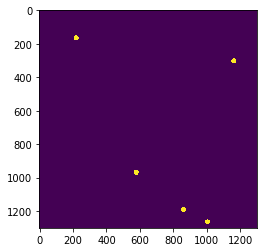

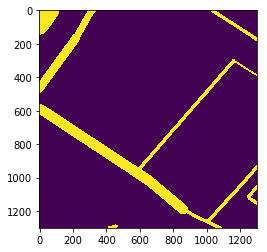

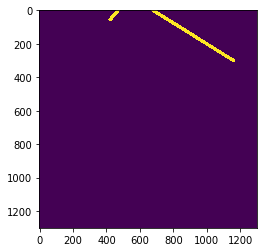

In [282]:
plt.imshow(intersections_mask)
plt.show()
plt.imshow(paved_mask)
plt.show()
plt.imshow(unpaved_mask)
plt.show()

In [228]:
sample_df = geojson_df[((geojson_df.img_id == 'AOI_4_Shanghai_img824'))]
sample_df

Unnamed: 0                                         linestring  \
33982           0  [[121.6638792, 31.320284429602065], [121.66281...   
33983           1  [[121.66218393424, 31.32107620396], [121.66229...   
33984           2  [[121.66319858849, 31.32225434122], [121.66242...   
33985           3  [[121.6603692, 31.32205723804605], [121.662183...   
33986           4  [[121.66319858849, 31.32225434122], [121.66323...   
33987           5  [[121.66279352125646, 31.3224759], [121.663198...   
33988           6  [[121.66191400705, 31.31967415862], [121.66291...   
33989           7  [[121.66174938356, 31.319454552], [121.6619140...   
33990           8  [[121.6616451988158, 31.3189659], [121.6618368...   
33991           9  [[121.66053645153225, 31.3189659], [121.660580...   
33992          10  [[121.66225017439, 31.32012260199], [121.66260...   
33993          11  [[121.6638792, 31.32009072449181], [121.662842...   
33994          12  [[121.66122816547515, 31.3189659], [121.661778...   
33995          13  [[121.66170380987, 31.32046145405], [121.66132...   
33996          14  [[121.66170380987, 31.32046145405], [121.66212...   

       lane_number  paved  road_type                 img_id  \
33982            2      1          6  AOI_4_Shanghai_img824   
33983            5      1          6  AOI_4_Shanghai_img824   
33984            8      1          3  AOI_4_Shanghai_img824   
33985            6      1          3  AOI_4_Shanghai_img824   
33986            7      1          3  AOI_4_Shanghai_img824   
33987            6      1          3  AOI_4_Shanghai_img824   
33988            2      1          6  AOI_4_Shanghai_img824   
33989            2      1          6  AOI_4_Shanghai_img824   
33990            2      2          6  AOI_4_Shanghai_img824   
33991           12      1          3  AOI_4_Shanghai_img824   
33992            2      1          6  AOI_4_Shanghai_img824   
33993            4      1          3  AOI_4_Shanghai_img824   
33994            4      1          6  AOI_4_Shanghai_img824   
33995            8      1          3  AOI_4_Shanghai_img824   
33996            8      1          3  AOI_4_Shanghai_img824   

                                            geojson_path  
33982  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
33983  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
33984  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
33985  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
33986  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
33987  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
33988  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
33989  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
33990  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
33991  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
33992  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
33993  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
33994  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
33995  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...  
33996  ../data/AOI_4_Shanghai_Roads_Train/geojson/spa...

In [195]:
depth(lst2)

3

In [191]:
len(lst1),len(lst2)

(2, 2)

In [173]:
ls_list = [[[121.66269227907, 31.31575305121], [121.66294476209, 31.31561732198], [121.66299422146, 31.31559608029], [121.66308116411, 31.31555476852], [121.66328923736553, 31.3154559]], [[121.66149877593834, 31.3154559], [121.66160901892, 31.31548437382]], [[121.6638792, 31.316121745286775], [121.66374372541, 31.31595887134], [121.66375971257, 31.31593374868], [121.6638792, 31.315857824372113]], [[121.66308116411, 31.31555476852], [121.6636248593, 31.31614839009], [121.6638792, 31.316436931251793]], [[121.6603692, 31.317379471575066], [121.66047605453, 31.31731790742], [121.66193686351, 31.3163534517], [121.66213599018, 31.31622198347], [121.66269227907, 31.31575305121]], [[121.66350576019, 31.3181497927], [121.66193686351, 31.3163534517]], [[121.66350576019, 31.3181497927], [121.6638792, 31.31791333054874]], [[121.6603692, 31.317698595658634], [121.66096731189, 31.31851951949]], [[121.66315120586982, 31.3189659], [121.6638792, 31.318491172753852]], [[[121.66151505528, 31.31881221987], [121.6616451988158, 31.3189659]], [[121.66219918446251, 31.3189659], [121.66350576019, 31.3181497927]]], [[121.6603692, 31.318730339590942], [121.66053645153225, 31.3189659]], [[121.66096731189, 31.31851951949], [121.66118104167, 31.31889688785], [121.66122816547515, 31.3189659]]]


for line in ls_list:
    for point in line:
        print(point)

[121.66269227907, 31.31575305121]
[121.66294476209, 31.31561732198]
[121.66299422146, 31.31559608029]
[121.66308116411, 31.31555476852]
[121.66328923736553, 31.3154559]
[121.66149877593834, 31.3154559]
[121.66160901892, 31.31548437382]
[121.6638792, 31.316121745286775]
[121.66374372541, 31.31595887134]
[121.66375971257, 31.31593374868]
[121.6638792, 31.315857824372113]
[121.66308116411, 31.31555476852]
[121.6636248593, 31.31614839009]
[121.6638792, 31.316436931251793]
[121.6603692, 31.317379471575066]
[121.66047605453, 31.31731790742]
[121.66193686351, 31.3163534517]
[121.66213599018, 31.31622198347]
[121.66269227907, 31.31575305121]
[121.66350576019, 31.3181497927]
[121.66193686351, 31.3163534517]
[121.66350576019, 31.3181497927]
[121.6638792, 31.31791333054874]
[121.6603692, 31.317698595658634]
[121.66096731189, 31.31851951949]
[121.66315120586982, 31.3189659]
[121.6638792, 31.318491172753852]
[[121.66151505528, 31.31881221987], [121.6616451988158, 31.3189659]]
[[121.66219918446251, 

In [197]:
draw_masks_new()

[[[121.66269227907, 31.31575305121], [121.66294476209, 31.31561732198], [121.66299422146, 31.31559608029], [121.66308116411, 31.31555476852], [121.66328923736553, 31.3154559]], [[121.66149877593834, 31.3154559], [121.66160901892, 31.31548437382]], [[121.6638792, 31.316121745286775], [121.66374372541, 31.31595887134], [121.66375971257, 31.31593374868], [121.6638792, 31.315857824372113]], [[121.66308116411, 31.31555476852], [121.6636248593, 31.31614839009], [121.6638792, 31.316436931251793]], [[121.6603692, 31.317379471575066], [121.66047605453, 31.31731790742], [121.66193686351, 31.3163534517], [121.66213599018, 31.31622198347], [121.66269227907, 31.31575305121]], [[121.66350576019, 31.3181497927], [121.66193686351, 31.3163534517]], [[121.66350576019, 31.3181497927], [121.6638792, 31.31791333054874]], [[121.6603692, 31.317698595658634], [121.66096731189, 31.31851951949]], [[121.66315120586982, 31.3189659], [121.6638792, 31.318491172753852]], [[[121.66151505528, 31.31881221987], [121.661

TypeError: can't multiply sequence by non-int of type 'float'

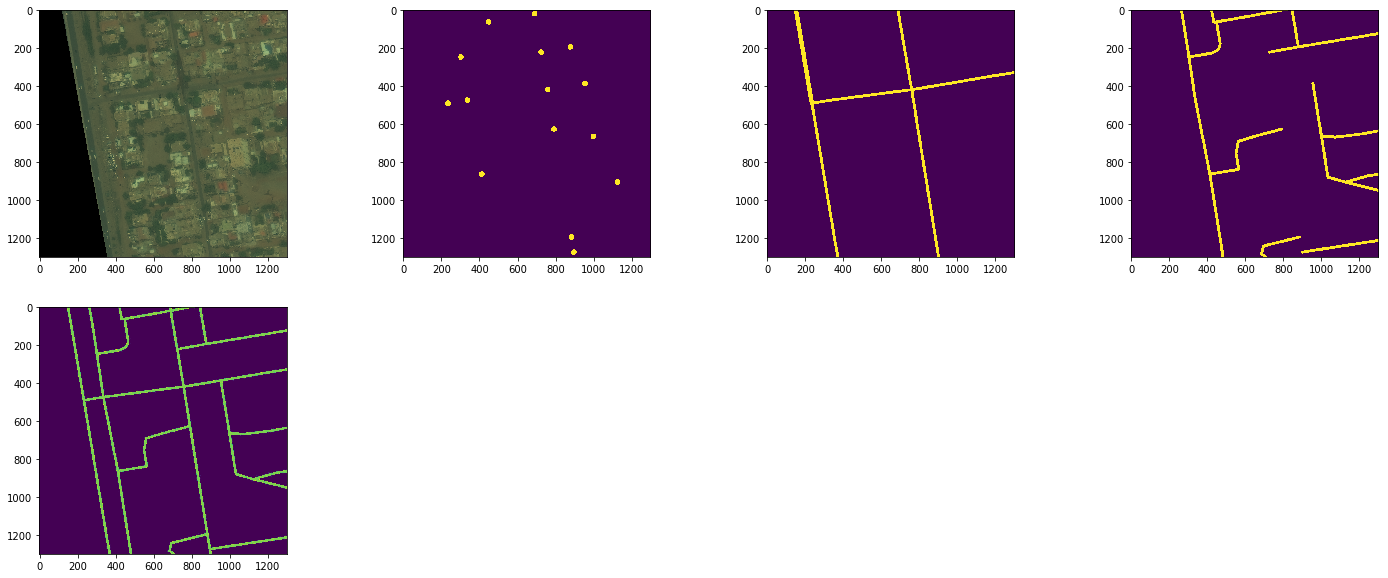

In [154]:
draw_masks_new()

In [ ]:
lane_numbers

In [101]:
random_image

'AOI_4_Shanghai_img683'

In [104]:
sample_df = geojson_df[((geojson_df.paved == 1)
                        &(geojson_df.img_id == random_image))]

lane_numbers = list(sample_df.lane_number.values)

In [105]:
lane_numbers

[2, 3, 2, 2, 3, 2]

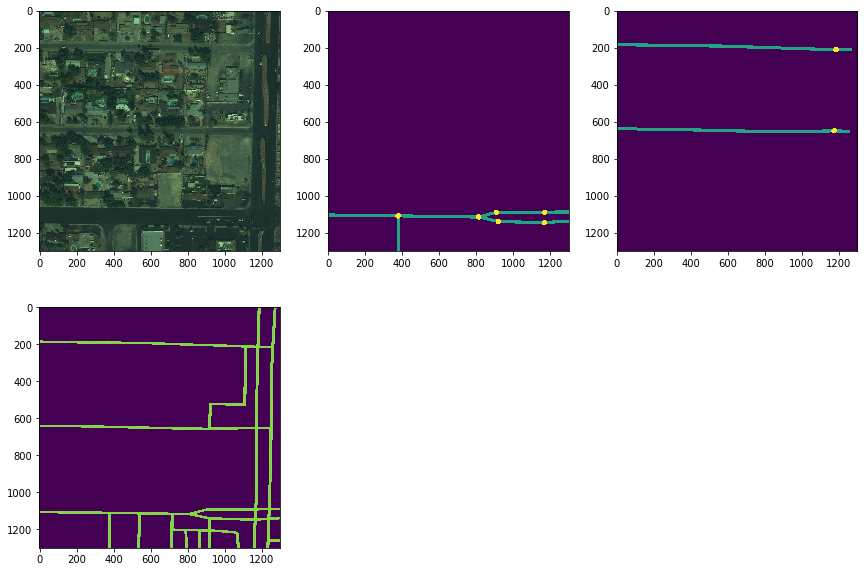

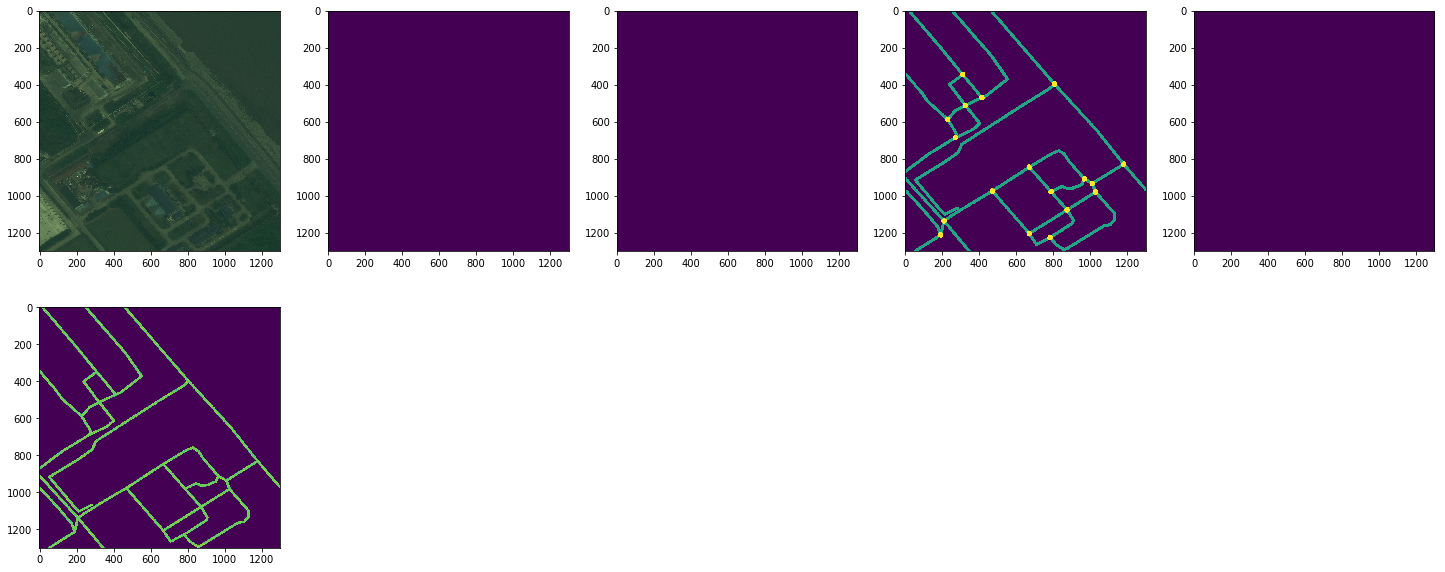

In [67]:
draw_masks_analyze_road_types()

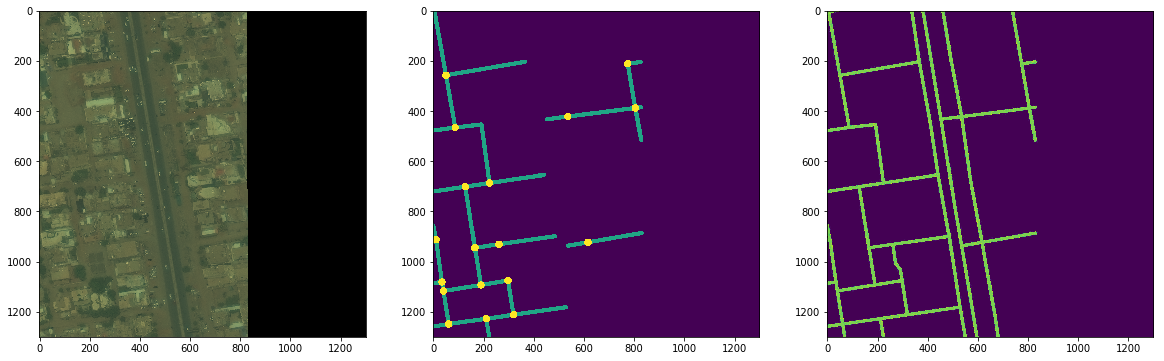

In [92]:
draw_masks(paved = 2,
           lane_number = 1)

## Georeferencing

In [10]:
geojson_df[geojson_df.img_id == 'AOI_2_Vegas_img738']

Unnamed: 0                                         linestring  lane_number  \
0           0  [[-115.2302976, 36.13671528660451], [-115.2295...            2   
1           1  [[-115.22732442896, 36.13768973302], [-115.228...            2   
2           2  [[-115.2273535423063, 36.1388276998], [-115.22...            2   
3           3  [[-115.2302976, 36.138575903683275], [-115.229...            2   
4           4  [[-115.22729652201, 36.13669630622], [-115.227...            2   
5           5  [[-115.22952784383, 36.13671025795], [-115.229...            2   

   paved  road_type              img_id  \
0      1          5  AOI_2_Vegas_img738   
1      1          5  AOI_2_Vegas_img738   
2      1          5  AOI_2_Vegas_img738   
3      1          5  AOI_2_Vegas_img738   
4      1          5  AOI_2_Vegas_img738   
5      1          5  AOI_2_Vegas_img738   

                                        geojson_path  
0  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
1  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
2  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
3  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
4  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
5  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...

In [11]:
!ls ../data/AOI_2_Vegas_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_2_Vegas_img738.geojson
!ls ../data/AOI_2_Vegas_Roads_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_2_Vegas_img738.tif

../data/AOI_2_Vegas_Roads_Train/geojson/spacenetroads/spacenetroads_AOI_2_Vegas_img738.geojson
../data/AOI_2_Vegas_Roads_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_2_Vegas_img738.tif


In [12]:
import rasterio
import ast

path = '../data/AOI_2_Vegas_Roads_Train/RGB-PanSharpen/RGB-PanSharpen_AOI_2_Vegas_img738.tif'
src = rasterio.open(path)
ls_list = [ast.literal_eval(ls) for ls in geojson_df[geojson_df.img_id == 'AOI_2_Vegas_img738'].linestring.values]
for line in ls_list:
    for point in line:
        print(~src.affine * (point[0],point[1]))

CRS({'init': 'epsg:4326'})

In [21]:
ls_list[0][0][0],ls_list[0][0][1]

(-115.2302976, 36.13671528660451)

The Affine object is a named tuple with elements a, b, c, d, e, f corresponding to the elements in the matrix equation below, in which a pixel’s image coordinates are x, y and its world coordinates are x', y'.:

```
| x' |   | a b c | | x |
| y' | = | d e f | | y |
| 1  |   | 0 0 1 | | 1 |
```

In [26]:
for line in ls_list:
    for point in line:
        print(~src.affine * (point[0],point[1]))

(0.0, 782.3752352986485)
(285.0948777794838, 784.2376998793334)
(1111.5103666707873, 789.4050071388483)
(1300.0, 790.6064189337194)
(1101.1744592562318, 421.469165770337)
(850.1263555586338, 417.93351772241294)
(1090.3917384073138, 0.0)
(1092.0647703707218, 97.18407130613923)
(1101.1744592562318, 421.469165770337)
(1111.5103666707873, 789.4050071388483)
(0.0, 93.25781835243106)
(280.23208148032427, 93.46501955762506)
(645.9653888940811, 97.8159379530698)
(1092.0647703707218, 97.18407130613923)
(1300.0, 96.88954514451325)
(1111.5103666707873, 789.4050071388483)
(1111.478386811912, 1300.0)
(285.0948777794838, 784.2376998793334)
(289.18985925614834, 999.9921900294721)
(291.4498066082597, 1300.0)


In [47]:
image_coordinates

array([[ 1.81470196e+07, -7.04628987e+07, -1.89249826e+02]])

In [52]:
from affine import Affine

geotransform = src.transform
fwd = Affine.from_gdal(*geotransform)

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2862: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [54]:
ls_list[0][0][0]

2.27591639993

In [58]:
rev = ~fwd
rev * (ls_list[0][0][0], ls_list[0][0][1])

(-44202163.99995446, -6546102.59762576)

In [ ]:
>>> 
>>> col, row = 0, 100
>>> fwd * (col, row)

>>> rev = ~fwd
>>> rev * fwd * (col, row)

# Create new masks

In [ ]:
data_prefix = '../data'

folders = ['AOI_2_Vegas_Roads_Train',
           'AOI_5_Khartoum_Roads_Train',
           'AOI_3_Paris_Roads_Train',
           'AOI_4_Shanghai_Roads_Train']

folders_to_iterate = ['MUL-PanSharpen']

meta_df = pd.read_csv('../metadata.csv')

for folder in folders_to_iterate:
    
    img_names = list(meta_df[ (meta_df.img_files.isin(folders))
                     & (meta_df.img_folders == folder)].img_subfolders.values)
    img_folders = list(meta_df[ (meta_df.img_files.isin(folders))
                     & (meta_df.img_folders == folder)].img_files.values)
    img_ids = [('AOI'+image.split('AOI')[1][:-4]) for image in img_names]
    
    input_data = zip(img_ids,img_folders,[folder]*len(img_ids),img_names)
    input_data = [item for item in input_data]


In [19]:
import os
import pandas as pd
from presets import preset_dict
from MaskUtils import create_new_masks
from skimage.io import imsave
import numpy as np

data_prefix = '../data'

folders = ['AOI_2_Vegas_Roads_Train',
           'AOI_5_Khartoum_Roads_Train',
           'AOI_3_Paris_Roads_Train',
           'AOI_4_Shanghai_Roads_Train']

folders_to_iterate = ['MUL-PanSharpen']


meta_df = pd.read_csv('../metadata.csv')

# manual curation of the dataset
# all unpaved roads with 2+ lanes set to paved
# geojson_df = pd.read_csv('geojson_df_full.csv')
# geojson_df.loc[(geojson_df.lane_number>2)&(geojson_df.paved == 2),'paved'] = 1

def create_new_mask_single(input_data):
    
    img_id = input_data[0]
    img_folder = input_data[1]
    local_folder = input_data[2]
    img_name = input_data[3]
    
    intersections_mask,paved_mask,unpaved_mask = create_new_masks(img_id)
    new_mask = np.clip(paved_mask+unpaved_mask,0,255)
    
    new_mask_folder = os.path.join(data_prefix,img_folder,local_folder+'_width_mask')
    new_mask_file = os.path.join(new_mask_folder,img_name[:-3]+'jpg')    
        
    # check that prediction folder exists
    if not os.path.exists(new_mask_folder):
        os.mkdir(new_mask_folder)    
        
    imsave(new_mask_file, new_mask)
    
    if new_mask.sum()>0:
        return 1
    else:
        return 0

    return 1

def create_new_mask_3layers(input_data):
    
    img_id = input_data[0]
    img_folder = input_data[1]
    local_folder = input_data[2]
    img_name = input_data[3]
    
    intersections_mask,paved_mask,unpaved_mask = create_new_masks(img_id)
    
    new_mask = np.zeros((1300,1300,3), 'uint8')
    new_mask[...,0] = intersections_mask
    new_mask[...,1] = paved_mask
    new_mask[...,2] = unpaved_mask

    new_mask = np.clip(new_mask,0,255)
    
    new_mask_folder = os.path.join(data_prefix,img_folder,local_folder+'_layered_mask')
    new_mask_file = os.path.join(new_mask_folder,img_name[:-3]+'jpg')    
        
    # check that prediction folder exists
    if not os.path.exists(new_mask_folder):
        os.mkdir(new_mask_folder)    
        
    imsave(new_mask_file, new_mask)
    
    if new_mask.sum()>0:
        return 1
    else:
        return 0

    return 1

for folder in folders_to_iterate:
    
    img_names = list(meta_df[ (meta_df.img_files.isin(folders))
                     & (meta_df.img_folders == folder)].img_subfolders.values)
    img_folders = list(meta_df[ (meta_df.img_files.isin(folders))
                     & (meta_df.img_folders == folder)].img_files.values)
    img_ids = [('AOI'+image.split('AOI')[1][:-4]) for image in img_names]
    
    input_data = zip(img_ids,img_folders,[folder]*len(img_ids),img_names)
    input_data = [item for item in input_data]


    


In [17]:
input_data[2000]

('AOI_4_Shanghai_img473',
 'AOI_4_Shanghai_Roads_Train',
 'MUL-PanSharpen',
 'MUL-PanSharpen_AOI_4_Shanghai_img473.tif')

In [18]:
create_new_mask_3layers(input_data[2000])

1

In [20]:
from multiprocessing import Pool
import tqdm

with Pool(10) as p:
    new_masks_data = list(tqdm.tqdm(p.imap(create_new_mask_3layers, input_data),
                                   total=len(input_data)))


  0%|          | 0/2780 [00:00<?, ?it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img113.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img107.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
  0%|          | 1/2780 [00:00<25:01,  1.85it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img61.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img5.jpg is a low contras

  9%|▉         | 256/2780 [00:12<01:59, 21.10it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img26.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 10%|▉         | 266/2780 [00:12<02:00, 20.90it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img63.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 10%|▉         | 269/2780 [00:12<02:01, 20.73it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img1627.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 10%|█         | 279/2780 [00:13<01:58, 21.09it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: 

 16%|█▌        | 449/2780 [00:21<01:49, 21.27it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img65.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img90.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 17%|█▋        | 481/2780 [00:21<01:45, 21.87it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img139.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img20.jpg is a

 24%|██▍       | 679/2780 [00:30<01:35, 22.04it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img148.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 25%|██▍       | 694/2780 [00:31<01:34, 22.09it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img1638.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img25.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 25%|██▌       | 701/2780 [00:31<01:34, 22.11it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_la

 32%|███▏      | 903/2780 [00:40<01:24, 22.12it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img155.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 33%|███▎      | 927/2780 [00:41<01:23, 22.22it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img145.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 34%|███▎      | 935/2780 [00:42<01:22, 22.24it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_2_Vegas_img75.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 34%|███▍      | 943/2780 [00:42<01:22, 22.21it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: 

 38%|███▊      | 1047/2780 [00:47<01:18, 21.99it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_5_Khartoum_img123.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 38%|███▊      | 1055/2780 [00:47<01:18, 22.09it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_5_Khartoum_img467.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_5_Khartoum_img90.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AO

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_5_Khartoum_img65.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 42%|████▏     | 1159/2780 [00:52<01:13, 22.04it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_5_Khartoum_img20.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_5_Khartoum_img3.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_5_Khartoum_img371.jpg is a low contrast image
  warn

 44%|████▍     | 1233/2780 [00:56<01:10, 21.83it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_5_Khartoum_img38.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_5_Khartoum_img460.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_5_Khartoum_img131.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 45%|████▍     | 1241/2780 [00:56<01:10, 21.84it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AO

 47%|████▋     | 1318/2780 [00:59<01:06, 22.09it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img146.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img489.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 48%|████▊     | 1322/2780 [00:59<01:06, 22.07it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img424.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img422.jpg

 49%|████▉     | 1374/2780 [01:01<01:03, 22.18it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img465.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 50%|████▉     | 1380/2780 [01:02<01:02, 22.23it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img485.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img251.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img126.jpg

 52%|█████▏    | 1442/2780 [01:04<00:59, 22.39it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img443.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img351.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img122.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img345.jpg is a low contrast image
  warn('%s is a low contra

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img91.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img64.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img325.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img237.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 54%|█████▍    | 1514/2780 [01:07<

 57%|█████▋    | 1573/2780 [01:09<00:53, 22.75it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_3_Paris_img212.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 57%|█████▋    | 1581/2780 [01:09<00:52, 22.78it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img239.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1481.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 57%|█████▋    | 1585/2780 [01:09<00:52, 22.80it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Trai

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img435.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 60%|██████    | 1676/2780 [01:13<00:48, 22.89it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img93.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img769.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1877.jpg is a low contrast image
  

 64%|██████▍   | 1783/2780 [01:17<00:43, 23.02it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img117.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 64%|██████▍   | 1788/2780 [01:17<00:43, 23.04it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1131.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1725.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img659.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 67%|██████▋   | 1864/2780 [01:20<00:39, 23.09it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1959.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1592.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img179.jpg is a low contrast image


 71%|███████   | 1965/2780 [01:24<00:35, 23.18it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img25.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img119.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 71%|███████   | 1971/2780 [01:24<00:34, 23.21it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img129.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 71%|███████   | 1975/2780 [01:25<00:34, 23.22it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img468.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 74%|███████▍  | 2064/2780 [01:28<00:30, 23.26it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img107.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1480.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1780.jpg is a low contrast image


/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img50.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img500.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1461.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1225.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 78%|██

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img21.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 81%|████████▏ | 2260/2780 [01:36<00:22, 23.39it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img197.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img109.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 82%|████████▏ | 2268/2780 [01:37<00:21, 23.33it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AO

 86%|████████▌ | 2385/2780 [01:41<00:16, 23.46it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img278.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img318.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img159.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 86%|████████▌ | 2395/2780 [01:42<00:16, 23.47it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_A

 90%|████████▉ | 2490/2780 [01:45<00:12, 23.53it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img54.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img389.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 90%|████████▉ | 2495/2780 [01:46<00:12, 23.53it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img314.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 90%|████████▉ | 2501/2780 [01:46<00:11, 23.56it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_

 94%|█████████▍| 2617/2780 [01:50<00:06, 23.61it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1178.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1242.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 94%|█████████▍| 2623/2780 [01:51<00:06, 23.56it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1369.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 95%|█████████▍| 2630/2780 [01:51<00:06, 23.59it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Ro

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img185.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img186.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 98%|█████████▊| 2719/2780 [01:55<00:02, 23.60it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1981.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1977.jpg is a low contrast image


In [5]:
from multiprocessing import Pool
import tqdm

with Pool(10) as p:
    new_masks_data = list(tqdm.tqdm(p.imap(create_new_mask_single, input_data),
                                   total=len(input_data)))


  0%|          | 0/2780 [00:00<?, ?it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img113.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img107.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
  0%|          | 1/2780 [00:00<06:59,  6.62it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img61.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img5.jpg is a low contrast image


/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img1631.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img116.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img63.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 10%|▉         | 269/2780 [00:04<00:44, 55.98it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img74.jpg is a low contrast image
  warn('%s is a low contrast image' 

 16%|█▌        | 449/2780 [00:07<00:40, 57.66it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img10.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img33.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img95.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 18%|█▊        | 500/2780 [00:08<00:36, 61.97it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img1622.jpg is a low co

 27%|██▋       | 737/2780 [00:11<00:31, 64.69it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img133.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img151.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 27%|██▋       | 747/2780 [00:11<00:31, 64.82it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img147.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 27%|██▋       | 756/2780 [00:11<00:31, 64.25it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_ma

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_5_Khartoum_img333.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_5_Khartoum_img2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_5_Khartoum_img40.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_5_Khartoum_img158.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/pyth

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_5_Khartoum_img43.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 42%|████▏     | 1177/2780 [00:18<00:25, 62.08it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_5_Khartoum_img394.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_5_Khartoum_img1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_5_Khartoum_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_5_Khartoum_img25.jpg is a low contrast image
  warn('%s is 

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_3_Paris_img309.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_3_Paris_img502.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_3_Paris_img499.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_3_Paris_img146.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 47%|████▋     | 1313/2780 [00:21<00:23,

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_3_Paris_img140.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_3_Paris_img49.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 50%|████▉     | 1384/2780 [00:21<00:21, 63.59it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_3_Paris_img63.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_3_Paris_img211.jpg is a low contrast image
  warn('%s is a low contrast image' 

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_3_Paris_img46.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_3_Paris_img215.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_3_Paris_img27.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 53%|█████▎    | 1480/2780 [00:22<00:20, 64.90it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_3_Paris_img426.jpg is a low contrast image
  warn('%s is a low contrast image' 

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_3_Paris_img475.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_3_Paris_img106.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 56%|█████▋    | 1567/2780 [00:23<00:18, 66.18it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_3_Paris_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_3_Paris_img212.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1481.jpg is a low contrast image
  warn('%s is a low contras

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img769.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 59%|█████▉    | 1650/2780 [00:25<00:17, 65.25it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img543.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img275.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1992.jpg is a low contrast image
  warn('%

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1910.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1479.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1986.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img73.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 65%|██████▌  

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img144.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1976.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 68%|██████▊   | 1895/2780 [00:28<00:13, 67.10it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1746.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1956.jpg is a low contrast image
  warn(

 71%|███████▏  | 1986/2780 [00:29<00:11, 66.96it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img199.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img717.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img156.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1276.jpg is a low contrast image
  warn('%

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img615.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1726.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img499.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 77%|███████▋  | 2127/2780 [00:31<00:09, 67.45it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img130.jpg is a low contrast image
  warn('%

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img140.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 80%|████████  | 2224/2780 [00:32<00:08, 67.46it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img121.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1462.jpg is a low contrast image
  warn('%s 

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img789.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1781.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img428.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1179.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 85%|████████▌

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img118.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img103.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img94.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img389.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/py

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1031.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 94%|█████████▎| 2601/2780 [00:38<00:02, 68.33it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1178.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1242.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 94%|█████████▍| 2612/2780 [00:38<00:02, 68.20it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img186.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1227.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1615.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
 98%|█████████▊| 2719/2780 [00:39<00:00, 68.04it/s]/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img51.jpg is a low contrast image
  warn('%

In [7]:
new_masks_df = pd.DataFrame()
new_masks_df['correct'] = new_masks_data
new_masks_df['img_names'] = img_names
new_masks_df['img_folders'] = img_folders
new_masks_df['img_ids'] = img_ids
new_masks_df['subfolders'] = [folder]*len(img_ids)
new_masks_df.to_csv('new_masks.csv')



In [21]:
new_masks_df = pd.DataFrame()
new_masks_df['correct'] = new_masks_data
new_masks_df['img_names'] = img_names
new_masks_df['img_folders'] = img_folders
new_masks_df['img_ids'] = img_ids
new_masks_df['subfolders'] = [folder]*len(img_ids)
new_masks_df.to_csv('new_masks_layered.csv')



In [23]:
df = pd.read_csv('new_masks.csv')

In [24]:
df.correct.value_counts()

1    2285
0     495
Name: correct, dtype: int64

'AOI_3_Paris_img509'

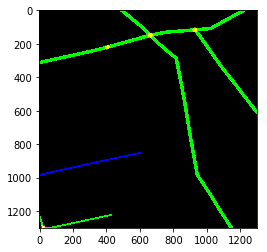

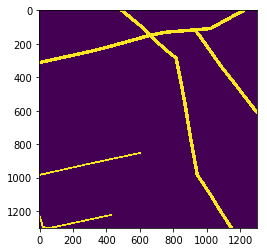

In [38]:
import matplotlib.pyplot as plt
from skimage.io import imread

img = imread('../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_layered_mask/MUL-PanSharpen_AOI_4_Shanghai_img1456.jpg')
plt.imshow(img)
plt.show()
img = imread('../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_4_Shanghai_img1456.jpg')
plt.imshow(img)
plt.show()

In [37]:
new_masks_df[new_masks_df.img_ids == df[df.correct == 1].sample(n=1).img_ids.values[0]]

correct                                  img_names  \
2630        1  MUL-PanSharpen_AOI_4_Shanghai_img1456.tif   

                     img_folders                 img_ids      subfolders  
2630  AOI_4_Shanghai_Roads_Train  AOI_4_Shanghai_img1456  MUL-PanSharpen

In [22]:
new_masks_df.correct.value_counts()

1    2538
0     242
Name: correct, dtype: int64

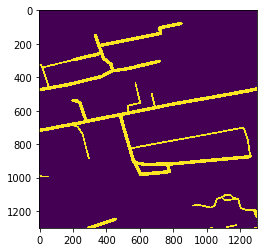

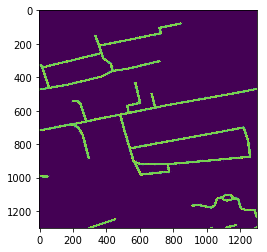

In [61]:
from skimage.io import imread
import matplotlib.pyplot as plt

sample_df = new_masks_df[new_masks_df.correct==1].sample(n=1)

mask1 =       (os.path.join(data_prefix,
                      sample_df.img_folders.values[0],
                      sample_df.subfolders.values[0]+'_width_mask',
                      sample_df.img_names.values[0][:-3]+'jpg'))

mask2 =       (os.path.join(data_prefix,
                      sample_df.img_folders.values[0],
                      sample_df.subfolders.values[0]+'_mask',
                      sample_df.img_names.values[0][:-3]+'jpg'))

mask1  = imread(mask1)
mask2  = imread(mask2)

plt.imshow(mask1)
plt.show()
plt.imshow(mask2)
plt.show()

In [32]:
mask1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [26]:
from IPython.display import FileLink


/home/keras/notebook/satellites_ssd/data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img451.jpg

In [27]:
FileLink(os.path.join(data_prefix,
                      sample_df.img_folders.values[0],
                      sample_df.subfolders.values[0]+'_mask',
                      sample_df.img_names.values[0][:-3]+'jpg'))

/home/keras/notebook/satellites_ssd/data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_mask/MUL-PanSharpen_AOI_2_Vegas_img451.jpg

In [25]:
create_new_mask_single(input_data[0])

44203740


1

In [1]:
create_new_mask_single(input_data[3])

NameError: name 'create_new_mask_single' is not defined

In [2]:
# manual curation of the dataset
# all unpaved roads with 2+ lanes set to paved
geojson_df = pd.read_csv('geojson_df_full.csv')
geojson_df.loc[(geojson_df.lane_number>2)&(geojson_df.paved == 2),'paved'] = 1


In [3]:
geojson_df[((geojson_df.img_id == 'AOI_2_Vegas_img113'))]
    

Unnamed: 0                                         linestring  \
8273           0  [[-115.29388473192, 36.21368851469], [-115.293...   
8274           1  [[-115.2934776, 36.21423348059328], [-115.2937...   
8275           2  [[-115.29622661447333, 36.2125376999], [-115.2...   
8276           3  [[-115.2969876, 36.21429807653742], [-115.2966...   
8277           4  [[-115.29558774324, 36.21433239532], [-115.295...   
8278           5  [[-115.2969876, 36.21501425437708], [-115.2968...   
8279           6  [[-115.2969876, 36.21572862297157], [-115.2968...   

      lane_number  paved  road_type              img_id  \
8273            2      1          5  AOI_2_Vegas_img113   
8274            2      1          5  AOI_2_Vegas_img113   
8275            2      1          5  AOI_2_Vegas_img113   
8276            2      1          5  AOI_2_Vegas_img113   
8277            2      1          5  AOI_2_Vegas_img113   
8278            2      1          5  AOI_2_Vegas_img113   
8279            2      1          5  AOI_2_Vegas_img113   

                                           geojson_path  
8273  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
8274  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
8275  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
8276  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
8277  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
8278  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...  
8279  ../data/AOI_2_Vegas_Roads_Train/geojson/spacen...

In [ ]:
# DEBUG

../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img113.jpg

In [2]:
input_data[3]

('AOI_2_Vegas_img113',
 'AOI_2_Vegas_Roads_Train',
 'MUL-PanSharpen',
 'MUL-PanSharpen_AOI_2_Vegas_img113.tif')

In [2]:
create_new_mask_single(input_data[3])

[[[-115.29388473192, 36.21368851469], [-115.2934776, 36.213497306988636]], [[-115.2934776, 36.21423348059328], [-115.29374391169, 36.21392722214], [-115.29388473192, 36.21368851469], [-115.29422542184, 36.21311100372], [-115.29438467290112, 36.2125376999]], [[-115.29622661447333, 36.2125376999], [-115.29623367148, 36.21266472602], [-115.29592832359, 36.21369821122]], [[-115.2969876, 36.21429807653742], [-115.29663297258, 36.21433239532], [-115.29582262624, 36.21440286022], [-115.29558774324, 36.21433239532], [-115.29592832359, 36.21369821122], [-115.29604576508, 36.21363949047], [-115.29642157788, 36.21366297877], [-115.2969876, 36.21361244108071]], [[-115.29558774324, 36.21433239532], [-115.29516495384, 36.21503704431]], [[-115.2969876, 36.21501425437708], [-115.29689134388, 36.21502530016], [-115.29584611454, 36.21511925336], [-115.29552902249, 36.21511925336], [-115.29516495384, 36.21503704431], [-115.29498879159, 36.21527192731], [-115.29495355914, 36.21563599596], [-115.2949300708

/opt/conda/lib/python3.5/site-packages/skimage/io/_io.py:132: UserWarning: ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img113.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


1

In [70]:
input_data[0]

('AOI_2_Vegas_img1603',
 'AOI_2_Vegas_Roads_Train',
 'MUL-PanSharpen',
 'MUL-PanSharpen_AOI_2_Vegas_img1603.tif')

In [ ]:
with Pool(10) as p:
    bit8_data = list(tqdm.tqdm(p.imap(create_8bit_test_images, input_data),
                                   total=len(input_data)))


In [58]:
meta_df.head()

Unnamed: 0  width  height  channels  im_size         ctime         mtime  \
0           0   1300    1300         1  3383838  1.515131e+09  1.511274e+09   
1           1   1300    1300         1  3383838  1.515131e+09  1.511274e+09   
2           2   1300    1300         1  3383838  1.515131e+09  1.511274e+09   
3           3   1300    1300         1  3383838  1.515131e+09  1.511274e+09   
4           4   1300    1300         1  3383838  1.515131e+09  1.511274e+09   

                       img_files img_folders               img_subfolders  
0  AOI_2_Vegas_Roads_Test_Public         PAN  PAN_AOI_2_Vegas_img1510.tif  
1  AOI_2_Vegas_Roads_Test_Public         PAN   PAN_AOI_2_Vegas_img338.tif  
2  AOI_2_Vegas_Roads_Test_Public         PAN  PAN_AOI_2_Vegas_img1468.tif  
3  AOI_2_Vegas_Roads_Test_Public         PAN   PAN_AOI_2_Vegas_img857.tif  
4  AOI_2_Vegas_Roads_Test_Public         PAN    PAN_AOI_2_Vegas_img86.tif

In [17]:
len(set(img_names))

3708

In [46]:
img_names[0]

'RGB-PanSharpen_AOI_2_Vegas_img1146.tif'

In [54]:
img_ids[0]

'AOI_2_Vegas_img1603'

In [66]:
from skimage.io import imsave

for folder in folders_to_iterate:
    
    img_names = list(meta_df[ (meta_df.img_files.isin(folders))
                     & (meta_df.img_folders == folder)].img_subfolders.values)
    img_folders = list(meta_df[ (meta_df.img_files.isin(folders))
                     & (meta_df.img_folders == folder)].img_files.values)
    img_ids = [('AOI'+image.split('AOI')[1][:-4]) for image in img_names]
    
    intersections_mask,paved_mask,unpaved_mask = create_new_masks(img_ids[0])
    new_mask = np.clip(paved_mask+unpaved_mask,0,255)
    
    new_mask_folder = os.path.join(data_prefix,img_folders[0],folder+'_width_mask')
    new_mask_file = os.path.join(new_mask_folder,img_names[0][:-3]+'jpg')
    
    # check that prediction folder exists
    if not os.path.exists(new_mask_folder):
        os.mkdir(new_mask_folder)    
        
    imsave(new_mask_file, new_mask)
    
    

In [63]:
new_mask_folder

'../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask'

In [61]:
img_names[0],img_folders[0],img_ids[0]

('MUL-PanSharpen_AOI_2_Vegas_img1603.tif',
 'AOI_2_Vegas_Roads_Train',
 'AOI_2_Vegas_img1603')

In [ ]:


fname, arr

In [41]:
len(set(geojson_df.img_id.values))

2549

In [ ]:
# check that prediction folder exists
if not os.path.exists(prediction_folder):
    os.mkdir(prediction_folder)  

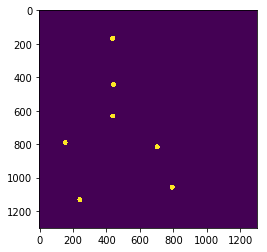

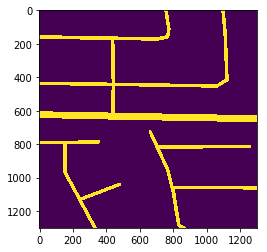

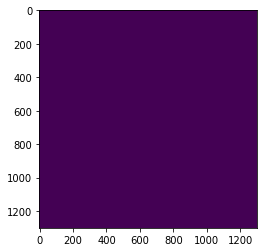

In [56]:
import matplotlib.pyplot as plt


plt.imshow(intersections_mask)
plt.show()
plt.imshow(paved_mask)
plt.show()
plt.imshow(unpaved_mask)
plt.show()

In [7]:
(paved_mask + unpaved_mask).max()

255

In [10]:
import numpy as np
new_mask = np.clip(paved_mask+unpaved_mask,0,255)

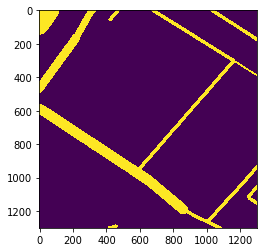

In [11]:
plt.imshow(new_mask)
plt.show()

# Generate predictions

## Test dataset

In [27]:
import os
import time
import numpy as np
import pandas as pd
from skimage.io import imread
import torch.utils.data as data

import warnings
warnings.filterwarnings('ignore')

# relative dataset storage path for test dataset
prefix = '../data'
# relative dataset storage path for train dataset
prefix_train = '../'
# metadata and mask_df files
meta_prefix = '../'
meta_data_file = os.path.join(meta_prefix,'metadata.csv')
mask_df_file = os.path.join(meta_prefix,'mask_df.csv')


# high level function that return list of images and cities under presets
def get_test_dataset(preset,
                     preset_dict):
    meta_df = pd.read_csv(meta_data_file)
    
    test_folders = ['AOI_2_Vegas_Roads_Test_Public','AOI_5_Khartoum_Roads_Test_Public',
               'AOI_3_Paris_Roads_Test_Public','AOI_4_Shanghai_Roads_Test_Public']
    
    # select the images
    sample_df = meta_df[(meta_df.img_files.isin(test_folders))
                        &(meta_df.width == preset_dict[preset]['width'])
                        &(meta_df.channels == preset_dict[preset]['channel_count'])
                        &(meta_df.img_folders == preset_dict[preset]['subfolder'])]

    # get the data as lists for simplicity
    or_imgs = list(sample_df[['img_subfolders','img_files','img_folders']]
                   .apply(lambda row: os.path.join(prefix,row['img_files'],row['img_folders'],row['img_subfolders']), axis=1).values)

    le, u = sample_df['img_folders'].factorize()
    sample_df.loc[:,'city_no'] = le
    cty_no = list(sample_df.city_no.values)
    
    city_folders = list(sample_df.img_files.values)
    img_names = list(sample_df.img_subfolders.values)
    
    return or_imgs,city_folders,img_names,cty_no,prefix

In [11]:
!ls ../data/

AOI_2_Vegas_Roads_Test_Public	  AOI_4_Shanghai_Roads_Train
AOI_2_Vegas_Roads_Train		  AOI_5_Khartoum_Roads_Test_Public
AOI_3_Paris_Roads_Test_Public	  AOI_5_Khartoum_Roads_Train
AOI_3_Paris_Roads_Train		  SpaceNet_Roads_Sample
AOI_4_Shanghai_Roads_Test_Public  visualizer-1.0


In [17]:
331+96+105+400-4

928

In [15]:
!ls -ls ../data/AOI_2_Vegas_Roads_Test_Public/MUL-PanSharpen | wc -l
!ls -ls ../data/AOI_5_Khartoum_Roads_Test_Public/MUL-PanSharpen | wc -l
!ls -ls ../data/AOI_3_Paris_Roads_Test_Public/MUL-PanSharpen | wc -l
!ls -ls ../data/AOI_4_Shanghai_Roads_Test_Public/MUL-PanSharpen | wc -l

331
96
105
400


In [28]:
from presets import preset_dict

preset = 'mul_ps_8channel'

or_imgs,city_folders,img_names,cty_no = get_test_dataset(preset,preset_dict)

In [29]:
or_imgs[900],city_folders[900],img_names[900]

('../data/AOI_4_Shanghai_Roads_Test_Public/MUL-PanSharpen/MUL-PanSharpen_AOI_4_Shanghai_img1995.tif',
 'AOI_4_Shanghai_Roads_Test_Public',
 'MUL-PanSharpen_AOI_4_Shanghai_img1995.tif')

In [10]:
or_imgs[0]

'../data/AOI_2_Vegas_Roads_Test_Public/MUL-PanSharpen/MUL-PanSharpen_AOI_2_Vegas_img1489.tif'

In [8]:
len(cty_no_mask),len(or_imgs)

(928, 928)

In [34]:
from skimage.io import imsave
import torch 

test = torch.randn(1,1280,1280)
test = test.clamp(0,1)

imsave('test.jpg',test.cpu().numpy()[0,:,:])

In [46]:
from skimage.io import imread
from skimage import img_as_float

img = imread('../data/AOI_2_Vegas_Roads_Test_Public/RGB-PanSharpen/RGB-PanSharpen_AOI_2_Vegas_img522.tif')
img = img_as_float(img)

In [47]:
img.max()

0.028458075837338826

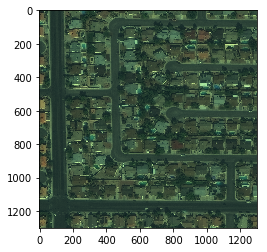

In [48]:
import matplotlib.pyplot as plt

img += -img.min()
img *= (1/img.max())

plt.imshow(img)
plt.show()

## Train dataset

In [71]:
import os
import time
import numpy as np
import pandas as pd
from skimage.io import imread
import torch.utils.data as data

import warnings
warnings.filterwarnings('ignore')

# relative dataset storage path for test dataset
prefix = '../data'
# relative dataset storage path for train dataset
prefix_train = '../'
# metadata and mask_df files
meta_prefix = '../'
meta_data_file = os.path.join(meta_prefix,'metadata.csv')
mask_df_file = os.path.join(meta_prefix,'mask_df.csv')


# high level function that return list of images and cities under presets
def get_test_dataset(preset,
                     preset_dict):
    meta_df = pd.read_csv(meta_data_file)
    
    test_folders = ['AOI_2_Vegas_Roads_Test_Public','AOI_5_Khartoum_Roads_Test_Public',
               'AOI_3_Paris_Roads_Test_Public','AOI_4_Shanghai_Roads_Test_Public']
    
    # select the images
    sample_df = meta_df[(meta_df.img_files.isin(test_folders))
                        &(meta_df.width == preset_dict[preset]['width'])
                        &(meta_df.channels == preset_dict[preset]['channel_count'])
                        &(meta_df.img_folders == preset_dict[preset]['subfolder'])]

    # get the data as lists for simplicity
    or_imgs = list(sample_df[['img_subfolders','img_files','img_folders']]
                   .apply(lambda row: os.path.join(prefix,row['img_files'],row['img_folders']+'_8bit',row['img_subfolders']), axis=1).values)

    le, u = sample_df['img_folders'].factorize()
    sample_df.loc[:,'city_no'] = le
    cty_no = list(sample_df.city_no.values)
    
    city_folders = list(sample_df.img_files.values)
    img_names = list(sample_df.img_subfolders.values)
    
    return or_imgs,city_folders,img_names,cty_no,prefix

# high level function that return list of images and cities under presets
def get_train_dataset(preset,
                     preset_dict):
    mask_df = pd.read_csv(mask_df_file)
    meta_df = pd.read_csv(meta_data_file)
    data_df = mask_df.merge(meta_df[['img_subfolders','width','channels']], how = 'left', left_on = 'img_file', right_on = 'img_subfolders')
    
    # select the images
    sample_df = data_df[(data_df.width == preset_dict[preset]['width'])
                        &(data_df.mask_max > 0)
                        &(data_df.channels == preset_dict[preset]['channel_count'])
                        &(data_df.img_subfolder == preset_dict[preset]['subfolder'])]

    # get the data as lists for simplicity
    bit8_imgs = list(sample_df.bit8_path.values)
    bit8_masks = list(sample_df.mask_path.values)
    bit8_imgs = [(os.path.join(prefix_train,path)) for path in bit8_imgs]
    bit8_masks = [(os.path.join(prefix_train,path)) for path in bit8_masks]
    le, u = sample_df['img_folder'].factorize()
    sample_df.loc[:,'city_no'] = le
    cty_no = list(sample_df.city_no.values)
    
    return bit8_imgs,bit8_masks,cty_no

def get_train_dataset_for_predict(preset,
                                  preset_dict):
    mask_df = pd.read_csv(mask_df_file)
    meta_df = pd.read_csv(meta_data_file)
    data_df = mask_df.merge(meta_df[['img_subfolders','width','channels']], how = 'left', left_on = 'img_file', right_on = 'img_subfolders')
    
    # select the images
    sample_df = data_df[(data_df.width == preset_dict[preset]['width'])
                        &(data_df.mask_max > 0)
                        &(data_df.channels == preset_dict[preset]['channel_count'])
                        &(data_df.img_subfolder == preset_dict[preset]['subfolder'])]
    
    # get the data as lists for simplicity
    bit8_imgs = list(sample_df.bit8_path.values)
    bit8_imgs = [(os.path.join(prefix_train,path)) for path in bit8_imgs]

    le, u = sample_df['img_folder'].factorize()
    sample_df.loc[:,'city_no'] = le
    cty_no = list(sample_df.city_no.values)
    
    city_folders = list(sample_df.img_folder.values)
    img_names = list(sample_df.img_file.values)    
    
    return bit8_imgs,city_folders,img_names,cty_no,prefix                              
                                  

In [62]:
from presets import preset_dict


In [72]:
or_imgs,city_folders,img_names,cty_no,prefix = get_train_dataset_for_predict('mul_ps_vegetation',
                                                                preset_dict)

In [75]:
!ls '../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_8bit/MUL-PanSharpen_AOI_2_Vegas_img246.tif'

../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_8bit/MUL-PanSharpen_AOI_2_Vegas_img246.tif


In [74]:
or_imgs[0],city_folders[0],img_names[0],prefix

('../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_8bit/MUL-PanSharpen_AOI_2_Vegas_img246.tif',
 'AOI_2_Vegas_Roads_Train',
 'MUL-PanSharpen_AOI_2_Vegas_img246.tif',
 '../data')

# Evaluate averages over the datasets

All the distributions (input 16-bit images, transformed 8-bit images and test-set data) may have different pixel distributions.


I need to calculate the max/min vales / histograms for all of the datasets.


I will evaluate only on MUL-PS data as the most promising.


In [2]:
import glob as glob
import os
import pandas as pd
from presets import preset_dict
import numpy as np
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import tqdm 
data_prefix = '../data'

train_folders = ['AOI_2_Vegas_Roads_Train',
           'AOI_5_Khartoum_Roads_Train',
           'AOI_3_Paris_Roads_Train',
           'AOI_4_Shanghai_Roads_Train']

test_folders = ['AOI_2_Vegas_Roads_Test_Public',
                'AOI_3_Paris_Roads_Test_Public',
                'AOI_4_Shanghai_Roads_Test_Public',
                'AOI_5_Khartoum_Roads_Test_Public']

subfolders = ['MUL-PanSharpen','MUL-PanSharpen_8bit']


edges_8bit = np.array([  0. ,  10.2,  20.4,  30.6,  40.8,  51. ,  61.2,  71.4,  81.6,91.8, 102. , 112.2, 122.4, 132.6, 142.8, 153. , 163.2, 173.4,183.6, 193.8, 204. , 214.2, 224.4, 234.6, 244.8, 255. ])

edges_16bit = np.array([1.00000e+00, 8.28400e+01, 1.64680e+02, 2.46520e+02, 3.28360e+02,
       4.10200e+02, 4.92040e+02, 5.73880e+02, 6.55720e+02, 7.37560e+02,
       8.19400e+02, 9.01240e+02, 9.83080e+02, 1.06492e+03, 1.14676e+03,
       1.22860e+03, 1.31044e+03, 1.39228e+03, 1.47412e+03, 1.55596e+03,
       1.63780e+03, 1.71964e+03, 1.80148e+03, 1.88332e+03, 1.96516e+03,
       2.04700e+03])

train_16_bit_imgs = []

for folder in train_folders:
    g = glob.glob(os.path.join(data_prefix,folder,subfolders[0])+'/*.tif')
    train_16_bit_imgs.extend(g)
    
train_8_bit_imgs = []

for folder in train_folders:
    g = glob.glob(os.path.join(data_prefix,folder,subfolders[1])+'/*.tif')
    train_8_bit_imgs.extend(g)    

test_16_bit_imgs = []

for folder in test_folders:
    g = glob.glob(os.path.join(data_prefix,folder,subfolders[0])+'/*.tif')
    test_16_bit_imgs.extend(g)    
    

In [3]:
# test (16 bit), train (16-bit), train (8-bit)
!ls ../data/AOI_2_Vegas_Roads_Test_Public/MUL-PanSharpen/ | wc -l
!ls ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen/ | wc -l
!ls ../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_8bit/ | wc -l

330
989
989


In [4]:
train_16_bit_imgs[-1], train_8_bit_imgs[-1], test_16_bit_imgs[-1]

('../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen/MUL-PanSharpen_AOI_4_Shanghai_img1246.tif',
 '../data/AOI_4_Shanghai_Roads_Train/MUL-PanSharpen_8bit/MUL-PanSharpen_AOI_4_Shanghai_img1246.tif',
 '../data/AOI_5_Khartoum_Roads_Test_Public/MUL-PanSharpen/MUL-PanSharpen_AOI_5_Khartoum_img396.tif')

In [35]:
img = imread(train_8_bit_imgs[0])    
frq1, edges = np.histogram(img, 
                          bins=edges_8bit)

frq2, edges = np.histogram(img.reshape(-1), 
                          bins=edges_8bit)

In [ ]:
np.percentile(a, 50)

In [47]:
for band in range(0,img.shape[2]):
    print(band)

0
1
2
3
4
5
6
7


/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint16 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


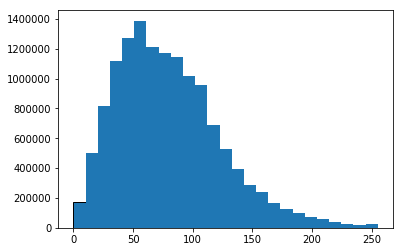

In [66]:
bins = edges_8bit
frq = calculate_hist_transform(train_16_bit_imgs[100])

fig, ax = plt.subplots()
ax.bar(bins[:-1], frq, width=np.diff(bins), ec="k", align="edge")
plt.show()

In [71]:
from sklearn.preprocessing import MinMaxScaler

def calculate_hist_transform(img_path):
    img = imread(img_path)   
    
    for band in range(0,img.shape[2]):
        
        down = np.percentile(img[:,:,band], 2)
        up = np.percentile(img[:,:,band], 98)
        
        if down == up:
            img = img.astype('uint8')
        else: 
            scaler = MinMaxScaler(feature_range = (down,up))
            img[:,:,band] = scaler.fit_transform(img[:,:,band])
            scaler = MinMaxScaler(feature_range = (0,255))  
            img[:,:,band] = scaler.fit_transform(img[:,:,band])        
            img = img.astype('uint8')
                
    frq, edges = np.histogram(img, 
                              bins=bins)        
    return frq

In [4]:
def calculate_hist(img_path):
    img = imread(img_path)    
    frq, edges = np.histogram(img, 
                              bins=bins)
    return frq

In [6]:
from multiprocessing import Pool

bins = edges_16bit

with Pool(6) as p:
    bit16_frq_data = list(tqdm.tqdm(p.imap(calculate_hist, train_16_bit_imgs),
                                   total=len(train_16_bit_imgs)))
    


100%|██████████| 2780/2780 [03:49<00:00, 12.11it/s]


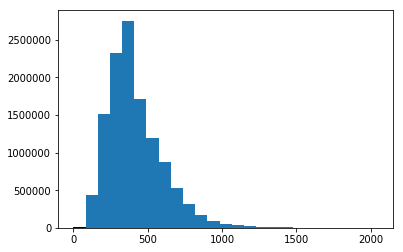

In [14]:
bit16_frq_data = np.asarray(bit16_frq_data)
mean_16_bit_train = bit16_frq_data.mean(axis=0)

fig, ax = plt.subplots()
ax.bar(edges_16bit[:-1], mean_16_bit_train, width=np.diff(edges_16bit), ec="k", align="edge")
plt.show()

In [33]:
bins = edges_8bit

with Pool(10) as p:
    bit8_frq_data = list(tqdm.tqdm(p.imap(calculate_hist, train_8_bit_imgs),
                                   total=len(train_8_bit_imgs)))

100%|██████████| 2780/2780 [02:07<00:00, 21.74it/s]


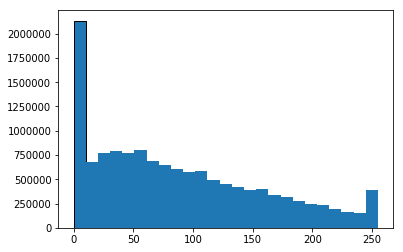

In [34]:
mean_8_bit_train = np.asarray(bit8_frq_data)
mean_8_bit_train = mean_8_bit_train.mean(axis=0)

fig, ax = plt.subplots()
ax.bar(edges_8bit[:-1], mean_8_bit_train, width=np.diff(edges_8bit), ec="k", align="edge")
plt.show()

In [24]:
bins = edges_16bit

with Pool(10) as p:
    test_16_frq_data = list(tqdm.tqdm(p.imap(calculate_hist_transform, test_16_bit_imgs),
                                   total=len(test_16_bit_imgs)))

100%|██████████| 928/928 [00:52<00:00, 17.52it/s]


In [ ]:
bins = edges_8bit

with Pool(10) as p:
    bit8_frq_data_transform = list(tqdm.tqdm(p.imap(calculate_hist_transform, train_16_bit_imgs),
                                   total=len(train_16_bit_imgs)))


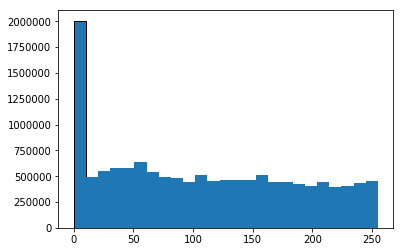

In [73]:
mean_16_bit_train_transform = np.asarray(bit8_frq_data_transform)
mean_16_bit_train_transform = mean_16_bit_train_transform.mean(axis=0)

fig, ax = plt.subplots()
ax.bar(edges_8bit[:-1], mean_16_bit_train_transform, width=np.diff(edges_8bit), ec="k", align="edge")
plt.show()

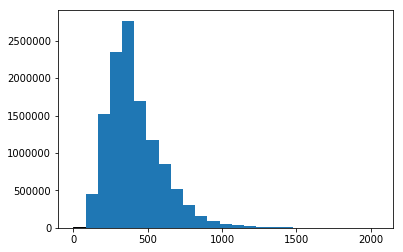

In [25]:
mean_16_bit_test = np.asarray(test_16_frq_data)
mean_16_bit_test = mean_16_bit_test.mean(axis=0)

fig, ax = plt.subplots()
ax.bar(edges_16bit[:-1], mean_16_bit_test, width=np.diff(edges_16bit), ec="k", align="edge")
plt.show()

In [ ]:
np.asarray(a) is a

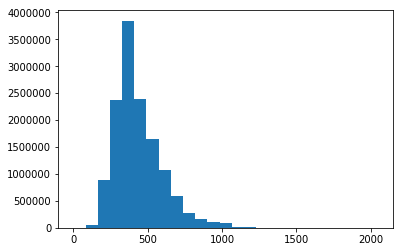

In [5]:
img1 = imread(train_16_bit_imgs[-1])
img2 = imread(train_8_bit_imgs[-1])
img3 = imread(test_16_bit_imgs[-1])

frq, edges = np.histogram(img1, 25)
fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), ec="k", align="edge")
plt.show()



In [7]:
frq.shape

(25,)

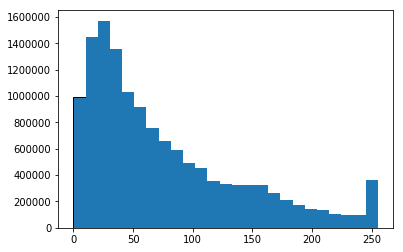

In [6]:
frq, edges = np.histogram(img2, 
                          bins=edges_8bit)
fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), ec="k", align="edge")
plt.show()

In [ ]:
frq, edges = np.histogram(img3, 25)
fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), ec="k", align="edge")
plt.show()

# Transform test data into 8-bit

In [4]:
import pandas as pd
from multiprocessing import Pool
import tqdm
import numpy as np
import os
import glob as glob
from skimage.io import imread, imsave
import osmnx as ox
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
from osgeo import gdal, ogr, osr
import cv2
import subprocess
import shapely
from shapely.geometry import MultiLineString
from matplotlib.patches import PathPatch
import matplotlib.path

imgs = []

# change this to your data prefix
path_prefix = '../data'

# default variables from the hosts of the challenge
buffer_meters = 2
burnValue = 150

# only test folders
folders = ['AOI_2_Vegas_Roads_Test_Public',
                'AOI_3_Paris_Roads_Test_Public',
                'AOI_4_Shanghai_Roads_Test_Public',
                'AOI_5_Khartoum_Roads_Test_Public']

# image types
prefix_dict = {
    'mul': 'MUL',
    'muls': 'MUL-PanSharpen',
    'pan': 'PAN',
    'rgbps': 'RGB-PanSharpen',    
}

for folder in folders:
    for prefix in prefix_dict.items():
        g = glob.glob(path_prefix+'/{}/{}/*.tif'.format(folder,prefix[1]))
        imgs.extend(g)
        
img_folders = [(img.split('/')[2]) for img in imgs]
img_subfolders = [(img.split('/')[3]) for img in imgs]   
img_files = [(img.split('/')[4]) for img in imgs]   




In [7]:
def create_8bit_test_images(input_data):
    img_path = input_data[0]  
    img_folder = input_data[1]
    img_subfolder = input_data[2]
    img_file = input_data[3]
 
    # create paths for masks and 8bit images
    bit8_folder = os.path.join(path_prefix,img_folder,img_subfolder+'_8bit')
    bit8_path = os.path.join(bit8_folder,img_file)

    if not os.path.exists(bit8_folder):
        os.mkdir(bit8_folder)
    if os.path.isfile(bit8_path):
        os.remove(bit8_path)
        
    try:
        # convert images to 8-bit
        convert_to_8Bit(img_path, 
                        bit8_path,
                        outputPixType='Byte',
                        outputFormat='GTiff',
                        rescale_type='rescale',
                        percentiles=[2,98])

    except BaseException as e:
        print(str(e))
        
    return [bit8_folder,bit8_path,img_path,img_folder,img_subfolder,img_file]

def convert_to_8Bit(inputRaster, outputRaster,
                           outputPixType='Byte',
                           outputFormat='GTiff',
                           rescale_type='rescale',
                           percentiles=[2, 98]):
    '''
    Convert 16bit image to 8bit
    rescale_type = [clip, rescale]
        if clip, scaling is done strictly between 0 65535 
        if rescale, each band is rescaled to a min and max 
        set by percentiles
    '''

    srcRaster = gdal.Open(inputRaster)
    cmd = ['gdal_translate', '-ot', outputPixType, '-of', 
           outputFormat]
    
    # iterate through bands
    for bandId in range(srcRaster.RasterCount):
        bandId = bandId+1
        band = srcRaster.GetRasterBand(bandId)
        if rescale_type == 'rescale':
            bmin = band.GetMinimum()        
            bmax = band.GetMaximum()
            # if not exist minimum and maximum values
            if bmin is None or bmax is None:
                (bmin, bmax) = band.ComputeRasterMinMax(1)
            # else, rescale
            band_arr_tmp = band.ReadAsArray()
            bmin = np.percentile(band_arr_tmp.flatten(), 
                                 percentiles[0])
            bmax= np.percentile(band_arr_tmp.flatten(), 
                                percentiles[1])

        else:
            bmin, bmax = 0, 65535

        cmd.append('-scale_{}'.format(bandId))
        cmd.append('{}'.format(bmin))
        cmd.append('{}'.format(bmax))
        cmd.append('{}'.format(0))
        cmd.append('{}'.format(255))

    cmd.append(inputRaster)
    cmd.append(outputRaster)
    # print("Conversin command:", cmd)
    subprocess.call(cmd)
    
    return

In [8]:
input_data = zip(imgs,img_folders,img_subfolders,img_files)
input_data = [item for item in input_data]


In [9]:
input_data[0]

('../data/AOI_2_Vegas_Roads_Test_Public/RGB-PanSharpen/RGB-PanSharpen_AOI_2_Vegas_img785.tif',
 'AOI_2_Vegas_Roads_Test_Public',
 'RGB-PanSharpen',
 'RGB-PanSharpen_AOI_2_Vegas_img785.tif')

In [12]:
with Pool(10) as p:
    bit8_data = list(tqdm.tqdm(p.imap(create_8bit_test_images, input_data),
                                   total=len(input_data)))
# transpose the list
bit8_data = list(map(list, zip(*bit8_data)))

bit8_df = pd.DataFrame()


100%|██████████| 3712/3712 [01:26<00:00, 42.97it/s]


NameError: name 'mask_data' is not defined

In [13]:
for i,key in enumerate(['bit8_folder','bit8_path','img_path','img_folder','img_subfolder','img_file']):
    bit8_df[key] = bit8_data[i]

bit8_df.to_csv('bit8_test.csv')

In [15]:
bit8_df[bit8_df.img_subfolder == 'RGB-PanSharpen'].shape

(928, 6)

In [6]:
!ls ../data/AOI_2_Vegas_Roads_Test_Public/

MUL		MUL-PanSharpen_8bit  PAN       RGB-PanSharpen
MUL-PanSharpen	MUL_8bit	     PAN_8bit  RGB-PanSharpen_8bit


In [5]:
! ls ../data/AOI_2_Vegas_Roads_Test_Public/RGB-PanSharpen/ | wc -l
! ls ../data/AOI_2_Vegas_Roads_Test_Public/RGB-PanSharpen_8bit/ | wc -l

330
330


In [4]:
! ls ../data/AOI_2_Vegas_Roads_Test_Public/MUL-PanSharpen/ | wc -l
! ls ../data/AOI_2_Vegas_Roads_Test_Public/MUL-PanSharpen_8bit/ | wc -l

330
330


# Train on new masks

In [6]:
mask_df = pd.read_csv(mask_df_file)
meta_df = pd.read_csv(meta_data_file)
data_df = mask_df.merge(meta_df[['img_subfolders','width','channels']], how = 'left', left_on = 'img_file', right_on = 'img_subfolders')

In [10]:
data_df[data_df.img_file == broken_wide_masks[0]]

Unnamed: 0                                         label_file  \
750         750  data/AOI_2_Vegas_Roads_Train/geojson/spacenetr...   

                                          bit8_folder  \
750  data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_8bit   

                                             bit8_path  \
750  data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_8b...   

                                          mask_folder  \
750  data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_mask   

                                             mask_path  \
750  data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_ma...   

                                              img_path  \
750  data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen/MU...   

                  img_folder   img_subfolder  \
750  AOI_2_Vegas_Roads_Train  MUL-PanSharpen   

                                  img_file  mask_max  \
750  MUL-PanSharpen_AOI_2_Vegas_img107.tif       150   

                            img_subfolders  width  channels  
750  MUL-PanSharpen_AOI_2_Vegas_img107.tif   1300         8

In [11]:
new_mask_df = pd.read_csv('new_masks.csv')
broken_wide_masks = list(new_mask_df[new_mask_df.correct == 0].img_names.values)


In [9]:
broken_wide_masks[0]

'MUL-PanSharpen_AOI_2_Vegas_img107.tif'

In [46]:
import os
import time
import numpy as np
import pandas as pd
from skimage.io import imread
import torch.utils.data as data

import warnings
warnings.filterwarnings('ignore')

# relative dataset storage path for test dataset
prefix = '../data'
# relative dataset storage path for train dataset
prefix_train = '../'
# metadata and mask_df files
meta_prefix = '../'
meta_data_file = os.path.join(meta_prefix,'metadata.csv')
mask_df_file = os.path.join(meta_prefix,'mask_df.csv')
wide_mask_df_file = 'new_masks.csv'

# high level function that return list of images and cities under presets
def get_train_dataset_wide_masks(preset,
                     preset_dict):
    mask_df = pd.read_csv(mask_df_file)
    meta_df = pd.read_csv(meta_data_file)
    data_df = mask_df.merge(meta_df[['img_subfolders','width','channels']], how = 'left', left_on = 'img_file', right_on = 'img_subfolders')

    new_mask_df = pd.read_csv('new_masks.csv')
    good_new_masks = list(new_mask_df[new_mask_df.correct == 1].img_names.values)
    
    # select the images
    sample_df = data_df[(data_df.width == preset_dict[preset]['width'])
                        &(data_df.mask_max > 0)
                        &(data_df.channels == preset_dict[preset]['channel_count'])
                        &(data_df.img_subfolder == preset_dict[preset]['subfolder'])
                        &(data_df.img_file.isin(good_new_masks))
                       ]

    # get the data as lists for simplicity
    bit8_imgs = list(sample_df.bit8_path.values)
    bit8_masks = list(sample_df.mask_path.values)
    
    # replace masks with width masks
    bit8_masks = [(path.replace("_mask","_width_mask")) for path in bit8_masks]
    
    bit8_imgs = [(os.path.join(prefix_train,path)) for path in bit8_imgs]
    bit8_masks = [(os.path.join(prefix_train,path)) for path in bit8_masks]
    le, u = sample_df['img_folder'].factorize()
    sample_df.loc[:,'city_no'] = le
    cty_no = list(sample_df.city_no.values)
    
    return bit8_imgs,bit8_masks,cty_no

In [47]:
from presets import preset_dict

bit8_imgs,bit8_masks,cty_no = get_train_dataset_wide_masks('mul_ps_vegetation',
                                 preset_dict)

In [20]:
!ls '../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img96.jpg'

../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img96.jpg


In [28]:
'../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_mask/MUL-PanSharpen_AOI_2_Vegas_img96.jpg'.replace("_mask","_width_mask")

'../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img96.jpg'

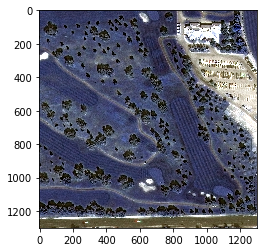

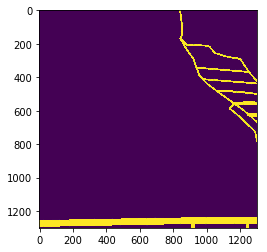

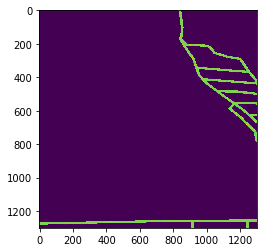

In [51]:
from skimage.io import imread
import matplotlib.pyplot as plt

img = imread(bit8_imgs[3])
mask1 = imread(bit8_masks[3])
mask2 = imread(bit8_masks[3].replace("_width_mask","_mask"))
plt.imshow(img[:,:,0:3])
plt.show()
plt.imshow(mask1)
plt.show()
plt.imshow(mask2)
plt.show()

In [48]:
len(bit8_masks)

2285

In [33]:
bit8_imgs[0],bit8_masks[0],cty_no[0]

('../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_8bit/MUL-PanSharpen_AOI_2_Vegas_img96.tif',
 '../data/AOI_2_Vegas_Roads_Train/MUL-PanSharpen_width_mask/MUL-PanSharpen_AOI_2_Vegas_img96.jpg',
 0)

# Play with multi-channel loss

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class TDiceLoss(nn.Module):
    def __init__(self, dice_weight=1):
        super().__init__()
        self.nll_loss = nn.BCELoss()
        self.dice_weight = dice_weight

    def forward(self, outputs, targets):
        loss = self.nll_loss(outputs, targets)
        print(loss.data.size())
        if self.dice_weight:
            eps = 1e-15
            dice_target = (targets == 1).float()
            dice_output = outputs
            intersection = (dice_output * dice_target).sum()
            union = dice_output.sum() + dice_target.sum() + eps
            loss -= torch.log(2 * intersection / union)

        return loss

In [6]:
output = torch.autograd.Variable(torch.clamp(torch.randn(1,3,100,100),0,1))
mask = torch.autograd.Variable(torch.clamp(torch.randn(1,3,100,100),0,1))

In [11]:
loss = TDiceLoss()
loss(output,mask)

torch.Size([1])


Variable containing:
 9.3893
[torch.FloatTensor of size 1]

Variable containing:
 9.3893
[torch.FloatTensor of size 1]

# Try inception resnet encoder

In [1]:
# standard pytorch imports
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.distributed as dist
import torch.optim
import torch.utils.data
import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from InceptionResnetv2 import inceptionresnetv2


In [2]:
ir = inceptionresnetv2(num_classes=1000, pretrained='imagenet')

Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth" to /home/keras/.torch/models/inceptionresnetv2-520b38e4.pth
100%|██████████| 223774246/223774246 [00:30<00:00, 7290668.95it/s] 


In [3]:
ir

InceptionResNetV2 (
  (conv2d_1a): BasicConv2d (
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True)
    (relu): ReLU ()
  )
  (conv2d_2a): BasicConv2d (
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True)
    (relu): ReLU ()
  )
  (conv2d_2b): BasicConv2d (
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True)
    (relu): ReLU ()
  )
  (maxpool_3a): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  (conv2d_3b): BasicConv2d (
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True)
    (relu): ReLU ()
  )
  (conv2d_4a): BasicConv2d (
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192

In [12]:
"""
all credits to ternaus and albu
"""
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
import torch.nn.functional as F

nonlinearity = nn.ReLU

class DecoderBlock(nn.Module):
    def __init__(self, in_channels, n_filters):
        super().__init__()

        # B, C, H, W -> B, C/4, H, W
        self.conv1 = nn.Conv2d(in_channels, in_channels // 4, 1)
        self.norm1 = nn.BatchNorm2d(in_channels // 4)
        self.relu1 = nonlinearity(inplace=True)

        # B, C/4, H, W -> B, C/4, H, W
        self.deconv2 = nn.ConvTranspose2d(in_channels // 4, in_channels // 4, 3,
                                          stride=2, padding=1, output_padding=1)
        self.norm2 = nn.BatchNorm2d(in_channels // 4)
        self.relu2 = nonlinearity(inplace=True)

        # B, C/4, H, W -> B, C, H, W
        self.conv3 = nn.Conv2d(in_channels // 4, n_filters, 1)
        self.norm3 = nn.BatchNorm2d(n_filters)
        self.relu3 = nonlinearity(inplace=True)

    def forward(self, x):
        x = self.conv1(x)
        x = self.norm1(x)
        x = self.relu1(x)
        x = self.deconv2(x)
        x = self.norm2(x)
        x = self.relu2(x)
        x = self.conv3(x)
        x = self.norm3(x)
        x = self.relu3(x)
        return x

class LinkNet34(nn.Module):
    def __init__(self, num_classes, num_channels=3):
        super().__init__()

        filters = [64, 128, 256, 512]
        resnet = models.resnet34(pretrained=True)

        # self.firstconv = resnet.conv1
        # assert num_channels == 3, "num channels not used now. to use changle first conv layer to support num channels other then 3"
        # try to use 8-channels as first input
        if num_channels==3:
            self.firstconv = resnet.conv1
        else:
            self.firstconv = nn.Conv2d(num_channels, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
            
        self.firstbn = resnet.bn1
        self.firstrelu = resnet.relu
        self.firstmaxpool = resnet.maxpool
        self.encoder1 = resnet.layer1
        self.encoder2 = resnet.layer2
        self.encoder3 = resnet.layer3
        self.encoder4 = resnet.layer4

        # Decoder
        self.decoder4 = DecoderBlock(filters[3], filters[2])
        self.decoder3 = DecoderBlock(filters[2], filters[1])
        self.decoder2 = DecoderBlock(filters[1], filters[0])
        self.decoder1 = DecoderBlock(filters[0], filters[0])

        # Final Classifier
        self.finaldeconv1 = nn.ConvTranspose2d(filters[0], 32, 3, stride=2)
        self.finalrelu1 = nonlinearity(inplace=True)
        self.finalconv2 = nn.Conv2d(32, 32, 3)
        self.finalrelu2 = nonlinearity(inplace=True)
        self.finalconv3 = nn.Conv2d(32, num_classes, 2, padding=1)

    # noinspection PyCallingNonCallable
    def forward(self, x):
        # Encoder
        x = self.firstconv(x)
        x = self.firstbn(x)
        x = self.firstrelu(x)
        x = self.firstmaxpool(x)
        e1 = self.encoder1(x)
        e2 = self.encoder2(e1)
        e3 = self.encoder3(e2)
        e4 = self.encoder4(e3)

        print(e1.size())
        print(e2.size())
        print(e3.size())
        print(e4.size())
        
        # Decoder with Skip Connections
        d4 = self.decoder4(e4) + e3
        # d4 = e3
        d3 = self.decoder3(d4) + e2
        d2 = self.decoder2(d3) + e1
        d1 = self.decoder1(d2)

        # Final Classification
        f1 = self.finaldeconv1(d1)
        f2 = self.finalrelu1(f1)
        f3 = self.finalconv2(f2)
        f4 = self.finalrelu2(f3)
        f5 = self.finalconv3(f4)

        return f5 
        # return F.sigmoid(f5)
        
class LinkNet50(nn.Module):
    def __init__(self, num_classes, num_channels=3):
        super().__init__()

        filters = [256, 512, 1024]
        resnet = models.resnet50(pretrained=True)

        # self.firstconv = resnet.conv1
        # assert num_channels == 3, "num channels not used now. to use changle first conv layer to support num channels other then 3"
        # try to use 8-channels as first input
        if num_channels==3:
            self.firstconv = resnet.conv1
        else:
            self.firstconv = nn.Conv2d(num_channels, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
            
        self.firstbn = resnet.bn1
        self.firstrelu = resnet.relu
        self.firstmaxpool = resnet.maxpool
        self.encoder1 = resnet.layer1
        self.encoder2 = resnet.layer2
        self.encoder3 = resnet.layer3

        # Decoder
        self.decoder3 = DecoderBlock(filters[2], filters[1])
        self.decoder2 = DecoderBlock(filters[1], filters[0])
        self.decoder1 = DecoderBlock(filters[0], filters[0])

        # Final Classifier
        self.finaldeconv1 = nn.ConvTranspose2d(filters[0], 32, 3, stride=2)
        self.finalrelu1 = nonlinearity(inplace=True)
        self.finalconv2 = nn.Conv2d(32, 32, 3)
        self.finalrelu2 = nonlinearity(inplace=True)
        self.finalconv3 = nn.Conv2d(32, num_classes, 2, padding=1)

    # noinspection PyCallingNonCallable
    def forward(self, x):
        # Encoder
        x = self.firstconv(x)
        x = self.firstbn(x)
        x = self.firstrelu(x)
        x = self.firstmaxpool(x)
        e1 = self.encoder1(x)
        e2 = self.encoder2(e1)
        e3 = self.encoder3(e2)

        print(e1.size())
        print(e2.size())
        print(e3.size())
        
        # Decoder with Skip Connections
        d3 = self.decoder3(e3) + e2
        d2 = self.decoder2(d3) + e1
        d1 = self.decoder1(d2)

        # Final Classification
        f1 = self.finaldeconv1(d1)
        f2 = self.finalrelu1(f1)
        f3 = self.finalconv2(f2)
        f4 = self.finalrelu2(f3)
        f5 = self.finalconv3(f4)

        return F.sigmoid(f5)
    
class LinkNet50_full(nn.Module):
    def __init__(self, num_classes, num_channels=3):
        super().__init__()

        filters = [256, 512, 1024, 2048]
        resnet = models.resnet50(pretrained=True)

        # self.firstconv = resnet.conv1
        # assert num_channels == 3, "num channels not used now. to use changle first conv layer to support num channels other then 3"
        # try to use 8-channels as first input
        if num_channels==3:
            self.firstconv = resnet.conv1
        else:
            self.firstconv = nn.Conv2d(num_channels, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
            
        self.firstbn = resnet.bn1
        self.firstrelu = resnet.relu
        self.firstmaxpool = resnet.maxpool
        self.encoder1 = resnet.layer1
        self.encoder2 = resnet.layer2
        self.encoder3 = resnet.layer3
        self.encoder4 = resnet.layer4
        
        # Decoder
        self.decoder4 = DecoderBlock(filters[3], filters[2])
        self.decoder3 = DecoderBlock(filters[2], filters[1])
        self.decoder2 = DecoderBlock(filters[1], filters[0])
        self.decoder1 = DecoderBlock(filters[0], filters[0])

        # Final Classifier
        self.finaldeconv1 = nn.ConvTranspose2d(filters[0], 32, 3, stride=2)
        self.finalrelu1 = nonlinearity(inplace=True)
        self.finalconv2 = nn.Conv2d(32, 32, 3)
        self.finalrelu2 = nonlinearity(inplace=True)
        self.finalconv3 = nn.Conv2d(32, num_classes, 2, padding=1)

    # noinspection PyCallingNonCallable
    def forward(self, x):
        # Encoder
        x = self.firstconv(x)
        x = self.firstbn(x)
        x = self.firstrelu(x)
        x = self.firstmaxpool(x)
        e1 = self.encoder1(x)
        e2 = self.encoder2(e1)
        e3 = self.encoder3(e2)
        e4 = self.encoder4(e3)        

        print(e1.size())
        print(e2.size())
        print(e3.size())
        
        # Decoder with Skip Connections
        d4 = self.decoder4(e4) + e3
        d3 = self.decoder3(d4) + e2
        d2 = self.decoder2(d3) + e1
        d1 = self.decoder1(d2)

        # Final Classification
        f1 = self.finaldeconv1(d1)
        f2 = self.finalrelu1(f1)
        f3 = self.finalconv2(f2)
        f4 = self.finalrelu2(f3)
        f5 = self.finalconv3(f4)

        return F.sigmoid(f5)    

In [69]:
ln34 = LinkNet34(num_classes=1, num_channels=3)
resnet50 = models.resnet50(pretrained=True)
ln50 = LinkNet50(num_classes=1, num_channels=3)

In [13]:
ln50_full = LinkNet50_full(num_classes=1, num_channels=3)

In [14]:
inputs = torch.autograd.Variable(torch.randn(1,3,512,512))
out = ln50_full(inputs)
print (out.size())

torch.Size([1, 256, 128, 128])
torch.Size([1, 512, 64, 64])
torch.Size([1, 1024, 32, 32])
torch.Size([1, 1, 512, 512])


In [70]:
inputs = torch.autograd.Variable(torch.randn(1,3,512,512))
out = ln50(inputs)
print (out.size())

torch.Size([1, 256, 128, 128])
torch.Size([1, 512, 64, 64])
torch.Size([1, 1024, 32, 32])
torch.Size([1, 1, 512, 512])


In [18]:
inputs = torch.autograd.Variable(torch.randn(1,3,512,512))
out = ln34(inputs)
print (out.size())

torch.Size([1, 64, 128, 128])
torch.Size([1, 128, 64, 64])
torch.Size([1, 256, 32, 32])
torch.Size([1, 512, 16, 16])
torch.Size([1, 1, 512, 512])


In [ ]:
class InceptionResnetVideoExtractor(nn.Module):
    def __init__(self,
                 ir):
        super(InceptionResnetVideoExtractor, self).__init__()
        
        self.stem = nn.Sequential(
            ir.conv2d_1a,
            ir.conv2d_2a,
            ir.conv2d_2b,
            ir.maxpool_3a,
            ir.conv2d_3b,
            ir.conv2d_4a,
            ir.maxpool_5a,
            ir.mixed_5b,
        )   
        
        self.mixed_6a = ir.mixed_6a
        self.mixed_7a = ir.mixed_7a
        
        self.avgpool1 = nn.AvgPool2d(48, stride=1)
        self.avgpool2 = nn.AvgPool2d(23, stride=1)
        self.avgpool3 = nn.AvgPool2d(11, stride=1)
        
        self.skip1 = ir.repeat
        self.skip2 = ir.repeat_1
        self.skip3 = ir.repeat_2

# Resize script

In [1]:
!ls 

InceptionResnetv2.py  UNet.py		   new_masks_layered.csv
LinkNet.py	      Untitled.ipynb	   presets.py
Loss.py		      __pycache__	   script.sh
LossSemSeg.py	      bit8_test.csv	   tb_logs
MaskUtils.py	      experiments.ipynb    test.jpg
SatellitesAugs.py     geojson_df.csv	   train_satellites.py
SatellitesDataset.py  geojson_df_full.csv  weights
TbLogger.py	      new_masks.csv


In [91]:
seed = 34545
img = np.zeros((3,1280,1280))

def RandomCrop(img = None,
               shape = 512):
    
    global seed
    random.seed(seed)
    x_shift =  random.randint(0, img.shape[1] - shape)
    random.seed(seed-1)
    y_shift =  random.randint(0, img.shape[2] - shape)
    print(x_shift,y_shift)
    
    return img[:,x_shift:x_shift+shape,x_shift:x_shift+shape]

img2 = RandomCrop(img = img)
print(img.shape)

411 74
(3, 1280, 1280)


# Try dehazing

In [3]:
!ls ../data/AOI_5_Khartoum_Roads_Test_Public/RGB-PanSharpen_8bit/RGB-PanSharpen_AOI_5_Khartoum_img52.tif

../data/AOI_3_Paris_Roads_Test_Public//RGB-PanSharpen_8bit/RGB-PanSharpen_AOI_3_Paris_img34.tif


In [4]:
ideal_image = ['../data/AOI_2_Vegas_Roads_Test_Public/RGB-PanSharpen_8bit/RGB-PanSharpen_AOI_2_Vegas_img58.tif']


hazy_images = ['../data/AOI_2_Vegas_Roads_Test_Public/RGB-PanSharpen_8bit/RGB-PanSharpen_AOI_2_Vegas_img733.tif',
               '../data/AOI_3_Paris_Roads_Test_Public/RGB-PanSharpen_8bit/RGB-PanSharpen_AOI_3_Paris_img34.tif',
               '../data/AOI_3_Paris_Roads_Test_Public/RGB-PanSharpen_8bit/RGB-PanSharpen_AOI_3_Paris_img69.tif',
               '../data/AOI_3_Paris_Roads_Test_Public/RGB-PanSharpen_8bit/RGB-PanSharpen_AOI_3_Paris_img240.tif',
               '../data/AOI_4_Shanghai_Roads_Test_Public/RGB-PanSharpen_8bit/RGB-PanSharpen_AOI_4_Shanghai_img9.tif',
              '../data/AOI_4_Shanghai_Roads_Test_Public/RGB-PanSharpen_8bit/RGB-PanSharpen_AOI_4_Shanghai_img135.tif',
               '../data/AOI_5_Khartoum_Roads_Test_Public/RGB-PanSharpen_8bit/RGB-PanSharpen_AOI_5_Khartoum_img52.tif',
               '../data/AOI_5_Khartoum_Roads_Test_Public/RGB-PanSharpen_8bit/RGB-PanSharpen_AOI_5_Khartoum_img132.tif',
               '../data/AOI_5_Khartoum_Roads_Test_Public/RGB-PanSharpen_8bit/RGB-PanSharpen_AOI_5_Khartoum_img425.tif'
              ]

In [13]:
# https://github.com/kindraywind/SingleImageHazeRemover/blob/master/dehaze.py
"""Single image dehazing."""
from __future__ import division
import cv2
import numpy as np


class Channel_value:
    val = -1.0
    intensity = -1.0

def find_intensity_of_atmospheric_light(img, gray):
    top_num = int(img.shape[0] * img.shape[1] * 0.001)
    toplist = [Channel_value()] * top_num
    dark_channel = find_dark_channel(img)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            val = img.item(y, x, dark_channel)
            intensity = gray.item(y, x)
            for t in toplist:
                if t.val < val or (t.val == val and t.intensity < intensity):
                    t.val = val
                    t.intensity = intensity
                    break

    max_channel = Channel_value()
    for t in toplist:
        if t.intensity > max_channel.intensity:
            max_channel = t

    return max_channel.intensity

def find_dark_channel(img):
    return np.unravel_index(np.argmin(img), img.shape)[2]

def clamp(minimum, x, maximum):
    return max(minimum, min(x, maximum))

def dehaze(img, light_intensity, windowSize, t0, w):
    size = (img.shape[0], img.shape[1])

    outimg = np.zeros(img.shape, img.dtype)

    for y in range(size[0]):
        for x in range(size[1]):
            x_low = max(x-(windowSize//2), 0)
            y_low = max(y-(windowSize//2), 0)
            x_high = min(x+(windowSize//2), size[1])
            y_high = min(y+(windowSize//2), size[0])

            sliceimg = img[y_low:y_high, x_low:x_high]

            dark_channel = find_dark_channel(sliceimg)
            t = 1.0 - (w * img.item(y, x, dark_channel) / light_intensity)

            outimg.itemset((y,x,0), clamp(0, ((img.item(y,x,0) - light_intensity) / max(t, t0) + light_intensity), 255))
            outimg.itemset((y,x,1), clamp(0, ((img.item(y,x,1) - light_intensity) / max(t, t0) + light_intensity), 255))
            outimg.itemset((y,x,2), clamp(0, ((img.item(y,x,2) - light_intensity) / max(t, t0) + light_intensity), 255))
    return outimg

In [20]:
from skimage.io import imsave


img = imread(hazy_images[1])
imsave(arr=img,fname='../dark-channel-prior-dehazing/src/img/test2.jpg')

/opt/conda/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


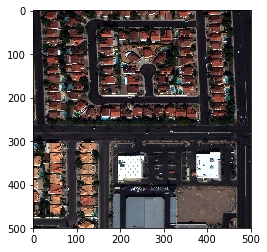

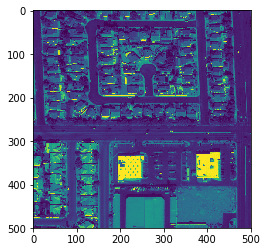

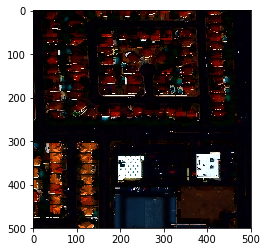

In [16]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.transform import resize

img = imread(ideal_image[0])
img = resize(img,output_shape = (500,500))
gray = rgb2gray(img)

plt.imshow(img)
plt.show()
plt.imshow(gray)
plt.show()

light_intensity = find_intensity_of_atmospheric_light(img, gray)
w = 0.95
t0 = 0.55
dehazed_img = dehaze(img, light_intensity, 20, t0, w)

plt.imshow(dehazed_img)
plt.show()

In [ ]:
dehazed_img

In [ ]:
def main():
    imageName = raw_input()  # eg. fg5.jpg
    img = cv2.imread(imageName)
    cv2.namedWindow("result", cv2.CV_WINDOW_AUTOSIZE)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    light_intensity = find_intensity_of_atmospheric_light(img, gray)
    w = 0.95
    t0 = 0.55
    outimg = dehaze(img, light_intensity, 20, t0, w)
    name = imageName+'_out_t0'+str(t0)+'_w'+str(w)+'.jpg'
    print name
    cv2.imwrite(name, outimg)

if __name__ == "__main__": main()

# Try 16-bit images

In [1]:
from presets import preset_dict
import pandas as pd
import os

In [2]:
# relative dataset storage path for test dataset
prefix = '../data'
# relative dataset storage path for train dataset
prefix_train = '../'
# metadata and mask_df files
meta_prefix = '../'
meta_data_file = os.path.join(meta_prefix,'metadata.csv')
mask_df_file = os.path.join(meta_prefix,'mask_df.csv')
wide_mask_df_file = 'new_masks.csv'
layered_mask_df_file = 'new_masks_layered.csv'

In [4]:
def get_train_16_bit_dataset_wide_masks(preset,
                     preset_dict):
    mask_df = pd.read_csv(mask_df_file)
    meta_df = pd.read_csv(meta_data_file)
    data_df = mask_df.merge(meta_df[['img_subfolders','width','channels']], how = 'left', left_on = 'img_file', right_on = 'img_subfolders')

    # filter out bad new masks
    new_mask_df = pd.read_csv(wide_mask_df_file)
    good_new_masks = list(new_mask_df[new_mask_df.correct == 1].img_names.values)
    
    # filter only roads with mostly non-paved roads 
    
    df = pd.read_csv('geojson_df_full.csv')
    table = pd.pivot_table(df,
                   index=["img_id"],
                   columns = ['paved'],
                   values=["linestring"],
                   aggfunc={len},fill_value=0)
    table.columns = ['count_paved','count_non_paved'] 
    mostly_non_paved_imgs = list(table[table.count_paved < table.count_non_paved].index.values)    
    
    
    # select the images
    sample_df = data_df[(data_df.width == preset_dict[preset]['width'])
                        &(data_df.mask_max > 0) # filter broken masks
                        &(data_df.channels == preset_dict[preset]['channel_count']) # preset filter
                        &(data_df.img_subfolder == preset_dict[preset]['subfolder']) # preset filter
                        &(data_df.img_file.isin(good_new_masks) # filter new good masks
                        &(data_df['img_subfolders']
                          .apply(lambda x: 'AOI'+x.split('AOI')[1][:-4])
                          .isin(mostly_non_paved_imgs)) # filter out mostly paved roads
                         )
                       ]

    # get the data as lists for simplicity
    bit16_imgs = list(sample_df.img_path.values)
    bit8_masks = list(sample_df.mask_path.values)
    
    # replace masks with width masks
    bit8_masks = [(path.replace("_mask","_width_mask")) for path in bit8_masks]
    
    bit16_imgs = [(os.path.join(prefix_train,path)) for path in bit16_imgs]
    bit8_masks = [(os.path.join(prefix_train,path)) for path in bit8_masks]
    le, u = sample_df['img_folder'].factorize()
    sample_df.loc[:,'city_no'] = le
    cty_no = list(sample_df.city_no.values)
    
    bit8_imgs = list(sample_df.bit8_path.values)
    bit8_imgs = [(os.path.join(prefix_train,path)) for path in bit8_imgs]
    
    return bit16_imgs,bit8_masks,cty_no,bit8_imgs

In [5]:
bit16_imgs,bit8_masks,cty_no,bit8_imgs = get_train_16_bit_dataset_wide_masks('mul_ps_vegetation',preset_dict)

/opt/conda/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [38]:
from skimage.io import imread
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def transform_image(img):
    img = img.astype('float32')
    for band in range(0,img.shape[2]):
        down = np.percentile(img[:,:,band], 2)
        up = np.percentile(img[:,:,band], 98)
        if down == up:
            print(down==up)
        else: 
            scaler = MinMaxScaler(feature_range = (down,up))
            img[:,:,band] = scaler.fit_transform(img[:,:,band])
            scaler = MinMaxScaler(feature_range = (0,1))  
            img[:,:,band] = scaler.fit_transform(img[:,:,band])        
            # img = img.astype('uint8')
    return img


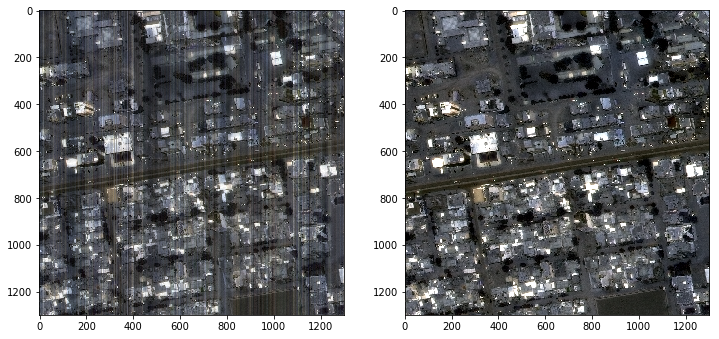

In [39]:
import matplotlib.pyplot as plt

img_16bit = imread(bit16_imgs[15])
img_16bit = transform_image(img_16bit)

img_8bit =  imread(bit8_imgs[15])

fig=plt.figure(figsize=(12, 6))

fig.add_subplot(1, 2, 1)
plt.imshow(img_16bit[:,:,0:3])

fig.add_subplot(1, 2, 2)
plt.imshow(img_8bit[:,:,0:3])


plt.show()     

# Siamese networks 

## Write generator

In [1]:
import os
import time
import numpy as np
import pandas as pd
from skimage.io import imread
import torch.utils.data as data

import warnings
warnings.filterwarnings('ignore')

# relative dataset storage path for test dataset
prefix = '../data'
# relative dataset storage path for train dataset
prefix_train = '../'
# metadata and mask_df files
meta_prefix = '../'
meta_data_file = os.path.join(meta_prefix,'metadata.csv')
mask_df_file = os.path.join(meta_prefix,'mask_df.csv')
wide_mask_df_file = 'new_masks.csv'
layered_mask_df_file = 'new_masks_layered.csv'

In [ ]:
class SatellitesDatasetRefine(data.Dataset):
    def __init__(self,
                 preset,
                 image_paths = [],
                 mask_paths = None,
                 narrow_mask_paths = None,
                 wide_mask_paths = None,
                 transforms = None,
                 ):
        
        self.mask_paths = mask_paths
        self.preset = preset
        self.transforms = transforms
        
        if mask_paths is not None:
            self.image_paths = sorted(image_paths)
            self.mask_paths = sorted(mask_paths)
            self.narrow_mask_paths = sorted(narrow_mask_paths)
            self.wide_mask_paths = sorted(wide_mask_paths)

            if len(self.image_paths) != len(mask_paths):
                raise ValueError('Mask list length <> image list lenth')
            if [path.split('/')[4].split('img')[1].split('.')[0] for path in self.image_paths] != [path.split('/')[4].split('img')[1].split('.')[0] for path in self.mask_paths]:            
                 raise ValueError('Mask list sorting <> image list sorting')
        else:
            self.image_paths = image_paths
            # self.image_paths = sorted(image_paths)
                
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        if self.mask_paths is not None: 

            img = imread(self.image_paths[idx])
            target_channels = np.zeros(shape=(self.preset['width'],self.preset['width'],len(self.preset['channels'])))
            
            # expand grayscale images to 3 dimensions
            if len(img.shape)<3:
                img = np.expand_dims(img, 2)                
            
            for i,channel in enumerate(self.preset['channels']):
                target_channels[:,:,i] = img[:,:,channel-1]
            
            target_channels = target_channels.astype('uint8')
            
            mask = imread(self.mask_paths[idx])
            mask = mask.astype('uint8')
            
            narrow_mask = imread(self.narrow_mask_paths[idx])
            narrow_mask = narrow_mask.astype('uint8')
            
            wide_mask = imread(self.wide_mask_paths[idx])
            wide_mask = mask.astype('uint8')            
            
            if self.transforms is not None:
                 target_channels, mask = self.transforms(target_channels, mask)
                 _, mask = self.transforms(target_channels, narrow_mask)
                 _, mask = self.transforms(target_channels, wide_mask)                
                    
            return target_channels,mask,narrow_mask,wide_mask                

        else:
            img = imread(self.image_paths[idx])
            target_channels = np.zeros(shape=(self.preset['width'],self.preset['width'],len(self.preset['channels'])))
            
            for i,channel in enumerate(self.preset['channels']):
                target_channels[:,:,i] = img[:,:,channel-1]
            
            target_channels = target_channels.astype('uint8')
            
            if self.transforms is not None:
                 target_channels, _ = self.transforms(target_channels, None)

                    return target_channels

In [32]:
from presets import preset_dict

bit8_imgs,bit8_masks,bit8_masks_narrow_pred,\
bit8_masks_wide_pred,cty_no = get_train_dataset_mul_ps_preds('mul_ps_vegetation',
                                                             preset_dict,
                                                             narrow_mask_folder = 'ln34_mul_ps_vegetation_aug_dice_predict_train_pad',
                                                             wide_mask_folder = 'ln34_wide_masks_mul_ps_vegetation_aug_dice_predict_train_pad'
                                                            )

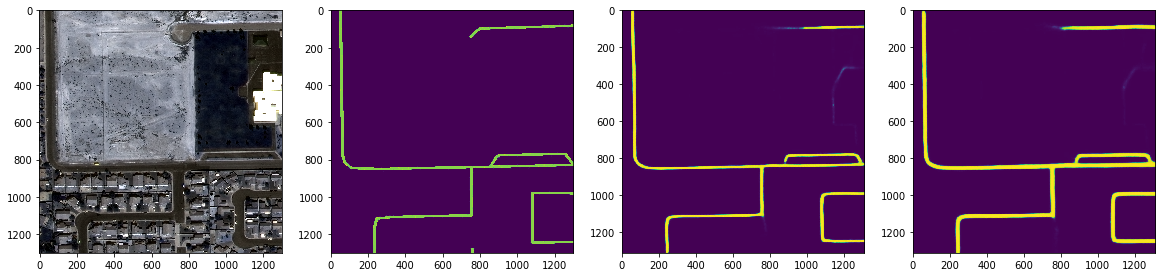

In [88]:
import matplotlib.pyplot as plt
from skimage.io import imread
import random

fig=plt.figure(figsize=(20, 5))

index = random.randint(a=0,b=len(bit8_imgs))

img1 = imread(bit8_imgs[index])
img2 = imread(bit8_masks[index])
img3 = imread(bit8_masks_narrow_pred[index])
img4 = imread(bit8_masks_wide_pred[index])

fig.add_subplot(1, 4, 1)
plt.imshow(img1[:,:,0:3])

fig.add_subplot(1, 4, 2)
plt.imshow(img2)

fig.add_subplot(1, 4, 3)
plt.imshow(img3)

fig.add_subplot(1, 4, 4)
plt.imshow(img4)

plt.show()     

In [35]:
!ls ../data/AOI_2_Vegas_Roads_Train/ln34_wide_masks_mul_ps_vegetation_aug_dice_predict_train_pad/MUL-PanSharpen_AOI_2_Vegas_img246.jpg

../data/AOI_2_Vegas_Roads_Train/ln34_wide_masks_mul_ps_vegetation_aug_dice_predict_train_pad/MUL-PanSharpen_AOI_2_Vegas_img246.jpg


In [30]:
preset_dict['mul_ps_vegetation']['subfolder']+'/'

'MUL-PanSharpen/'

In [31]:
# assumes that images have the same name

def get_train_dataset_mul_ps_preds(preset,
                     preset_dict,
                     narrow_mask_folder,
                     wide_mask_folder):
    mask_df = pd.read_csv(mask_df_file)
    meta_df = pd.read_csv(meta_data_file)
    data_df = mask_df.merge(meta_df[['img_subfolders','width','channels']], how = 'left', left_on = 'img_file', right_on = 'img_subfolders')
    
    # select the images
    sample_df = data_df[(data_df.width == preset_dict[preset]['width'])
                        &(data_df.mask_max > 0)
                        &(data_df.channels == preset_dict[preset]['channel_count'])
                        &(data_df.img_subfolder == preset_dict[preset]['subfolder'])]

    # get the data as lists for simplicity
    bit8_imgs = list(sample_df.bit8_path.values)
    bit8_masks = list(sample_df.mask_path.values)
    bit8_imgs = [(os.path.join(prefix_train,path)) for path in bit8_imgs]
    bit8_masks = [(os.path.join(prefix_train,path)) for path in bit8_masks]
    le, u = sample_df['img_folder'].factorize()
    sample_df.loc[:,'city_no'] = le
    cty_no = list(sample_df.city_no.values)
    
    bit8_masks_narrow_pred = [(mask.replace(preset_dict[preset]['subfolder']+'_mask',narrow_mask_folder)) for mask in bit8_masks]
    bit8_masks_wide_pred = [(mask.replace(preset_dict[preset]['subfolder']+'_mask',wide_mask_folder)) for mask in bit8_masks]    
    
    return bit8_imgs,bit8_masks,bit8_masks_narrow_pred,bit8_masks_wide_pred,cty_no